In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기

In [2]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [3]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

/var/folders/1s/7yblwm1x1sx198v0mh4s1tg40000gn/T/ipykernel_34134/2409215588.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


## 데이터 로드

In [4]:
df = pd.read_csv("전국도시공원정보표준데이터.csv", encoding="cp949")
df.shape

(18302, 19)

In [5]:
df.head()

관리번호        공원명  공원구분          소재지도로명주소                소재지지번주소  \
0  41390-00084       승지공원  근린공원  경기도 시흥시 능곡중앙로 85        경기도 시흥시 능곡동 552   
1  41830-00017   광탄2호 소공원   소공원               NaN    경기도 양평군 용문면 광탄리 711   
2  41830-00031   광탄3호 소공원   소공원               NaN    경기도 양평군 용문면 광탄리 762   
3  41830-00018     공흥 소공원   소공원               NaN  경기도 양평군 양평읍 공흥리 885-1   
4  41830-00019  한강아트로드 공원   소공원               NaN  경기도 양평군 강하면 운심리 43-25   

          위도          경도     공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  \
0  37.371378  126.813132  10842.0          NaN        조합놀이대          NaN   
1  37.509628  127.628406    856.0          NaN          NaN          NaN   
2  37.508443  127.627414    847.0          NaN          NaN          NaN   
3  37.493844  127.509326   1276.0          NaN          NaN          NaN   
4  37.496021  127.408216   3300.0          NaN          NaN          NaN   

  공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일     관리기관명          전화번호     데이터기준일자  \
0          도서관          NaN  2004-11-10  경기도 시흥시청  031-310-3869  2022-11-28   
1          NaN          NaN  1994-02-25  경기도 양평군청  031-770-2358  2023-05-26   
2          NaN          NaN  1994-02-25  경기도 양평군청  031-770-2358  2023-05-26   
3          NaN          NaN  2012-11-22  경기도 양평군청  031-770-2358  2023-05-26   
4          NaN          NaN  2012-08-30  경기도 양평군청  031-770-2358  2023-05-26   

    제공기관코드    제공기관명  
0  4010000  경기도 시흥시  
1  4170000  경기도 양평군  
2  4170000  경기도 양평군  
3  4170000  경기도 양평군  
4  4170000  경기도 양평군

In [6]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        14642
소재지지번주소           220
위도                  2
경도                  2
공원면적                0
공원보유시설(운동시설)    13200
공원보유시설(유희시설)    11818
공원보유시설(편익시설)    13208
공원보유시설(교양시설)    17545
공원보유시설(기타시설)    15536
지정고시일            3010
관리기관명            1367
전화번호             1131
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

In [7]:
# 결측치 비율 구하기
round(df.isnull().mean() * 100, 2)

관리번호             0.00
공원명              0.00
공원구분             0.00
소재지도로명주소        80.00
소재지지번주소          1.20
위도               0.01
경도               0.01
공원면적             0.00
공원보유시설(운동시설)    72.12
공원보유시설(유희시설)    64.57
공원보유시설(편익시설)    72.17
공원보유시설(교양시설)    95.86
공원보유시설(기타시설)    84.89
지정고시일           16.45
관리기관명            7.47
전화번호             6.18
데이터기준일자          0.00
제공기관코드           0.00
제공기관명            0.00
dtype: float64

## 결측치 시각화

In [8]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

<Axes: >

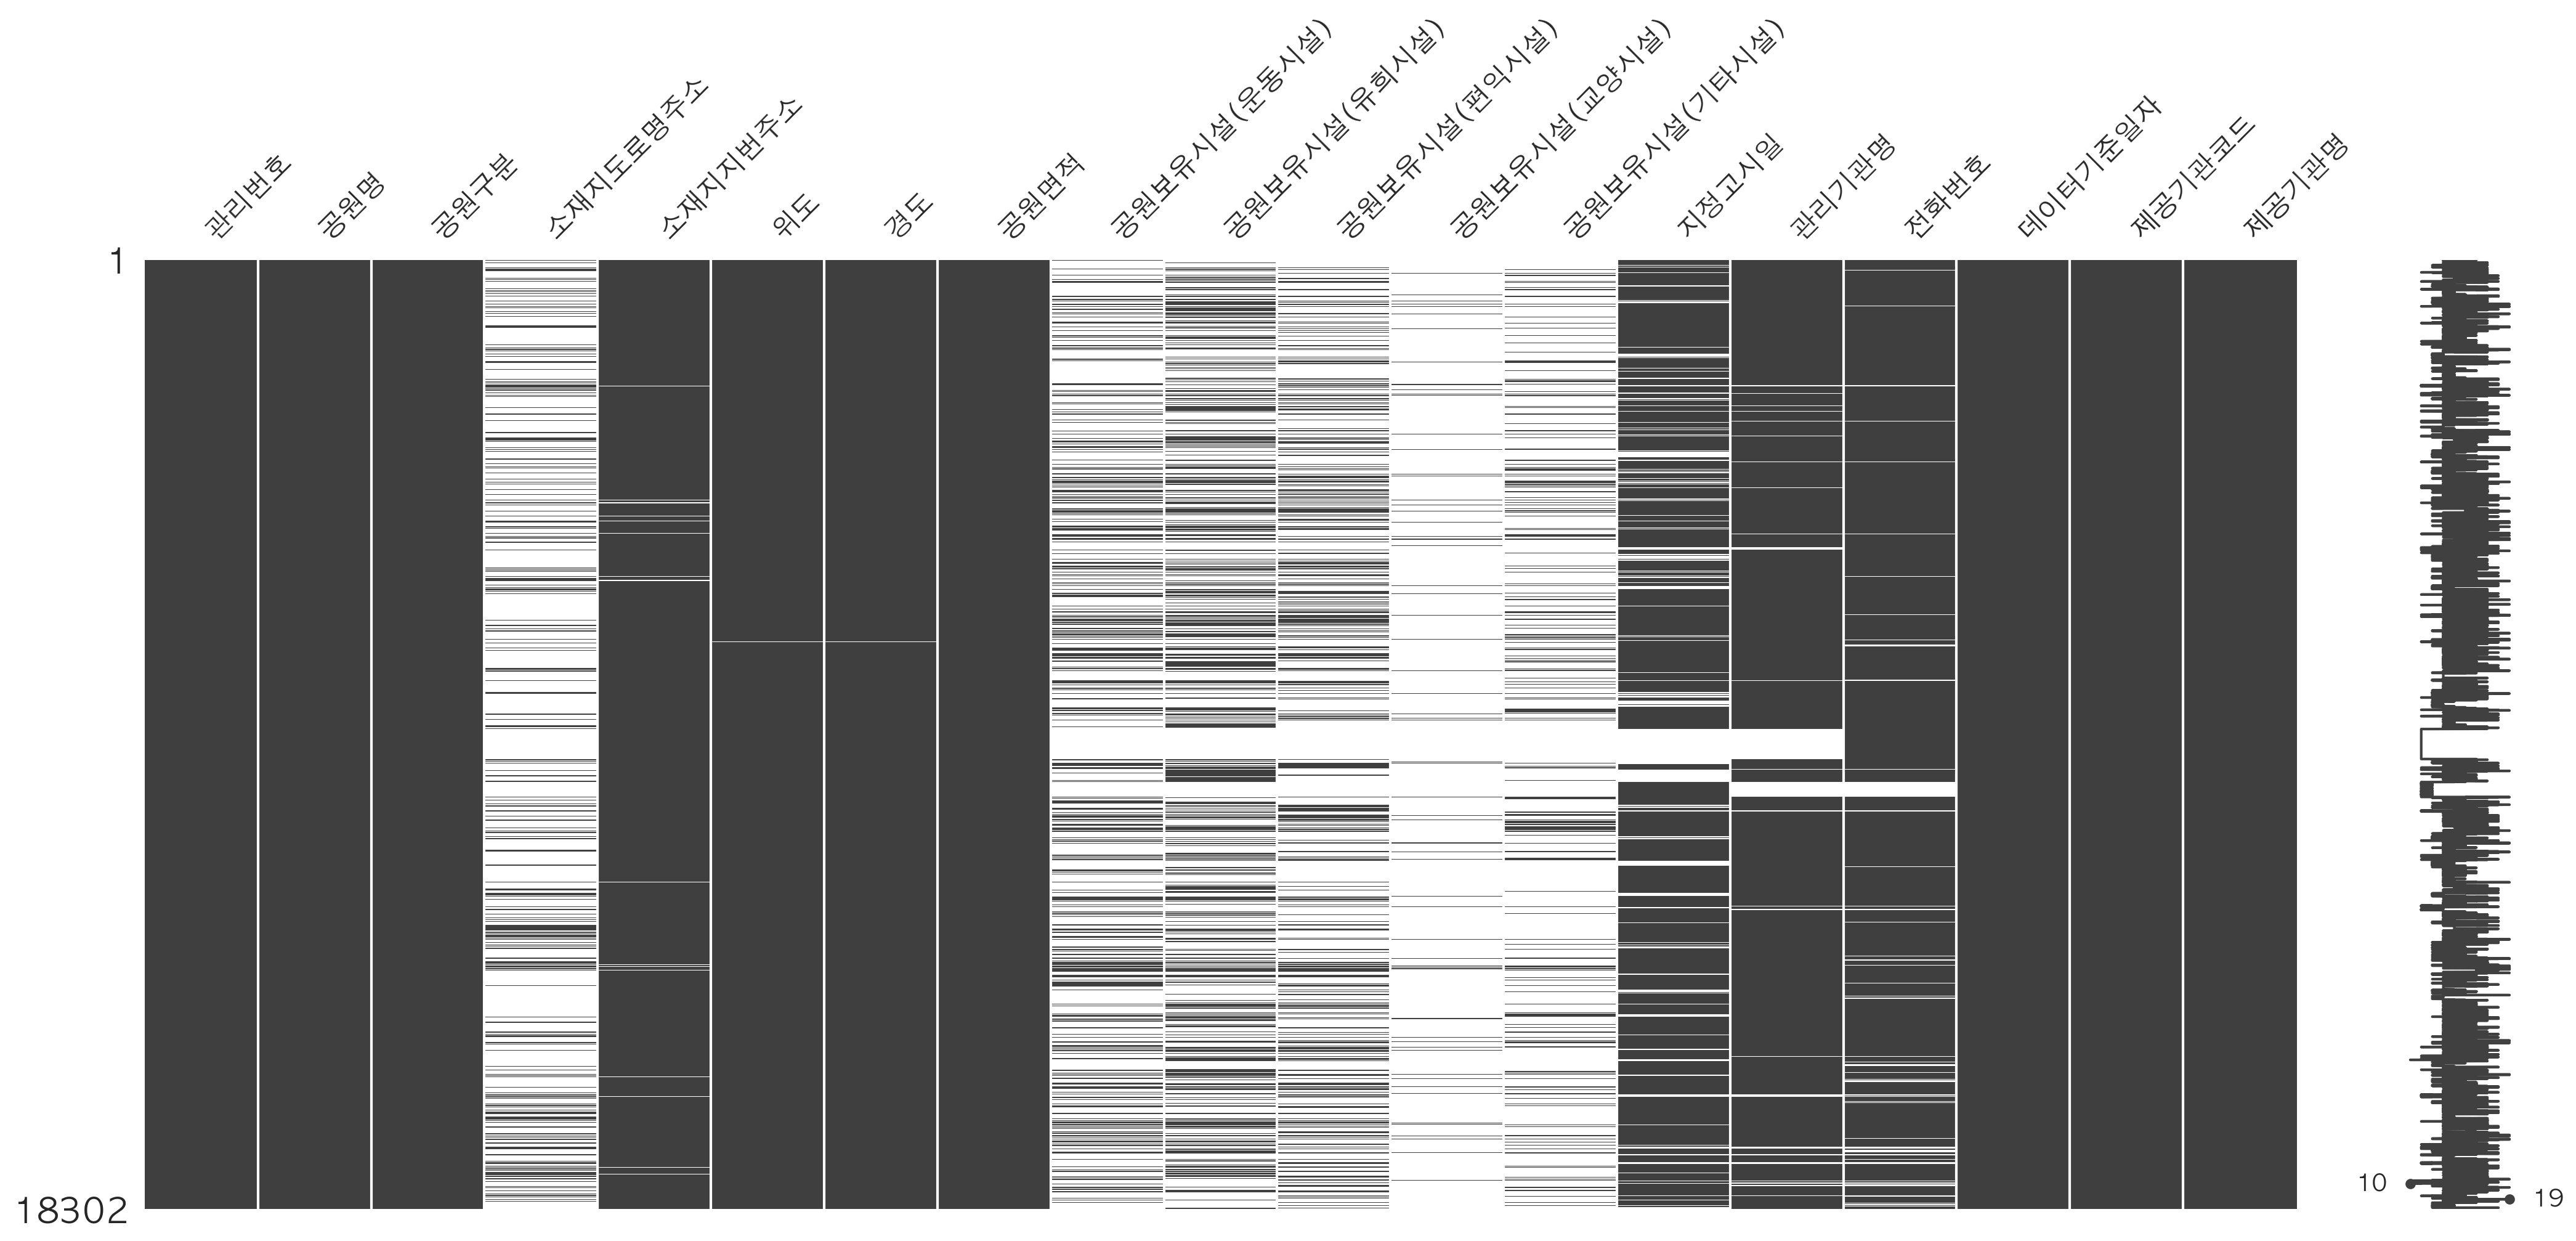

In [ ]:
import missingno
missingno.matrix(df)

<Axes: >

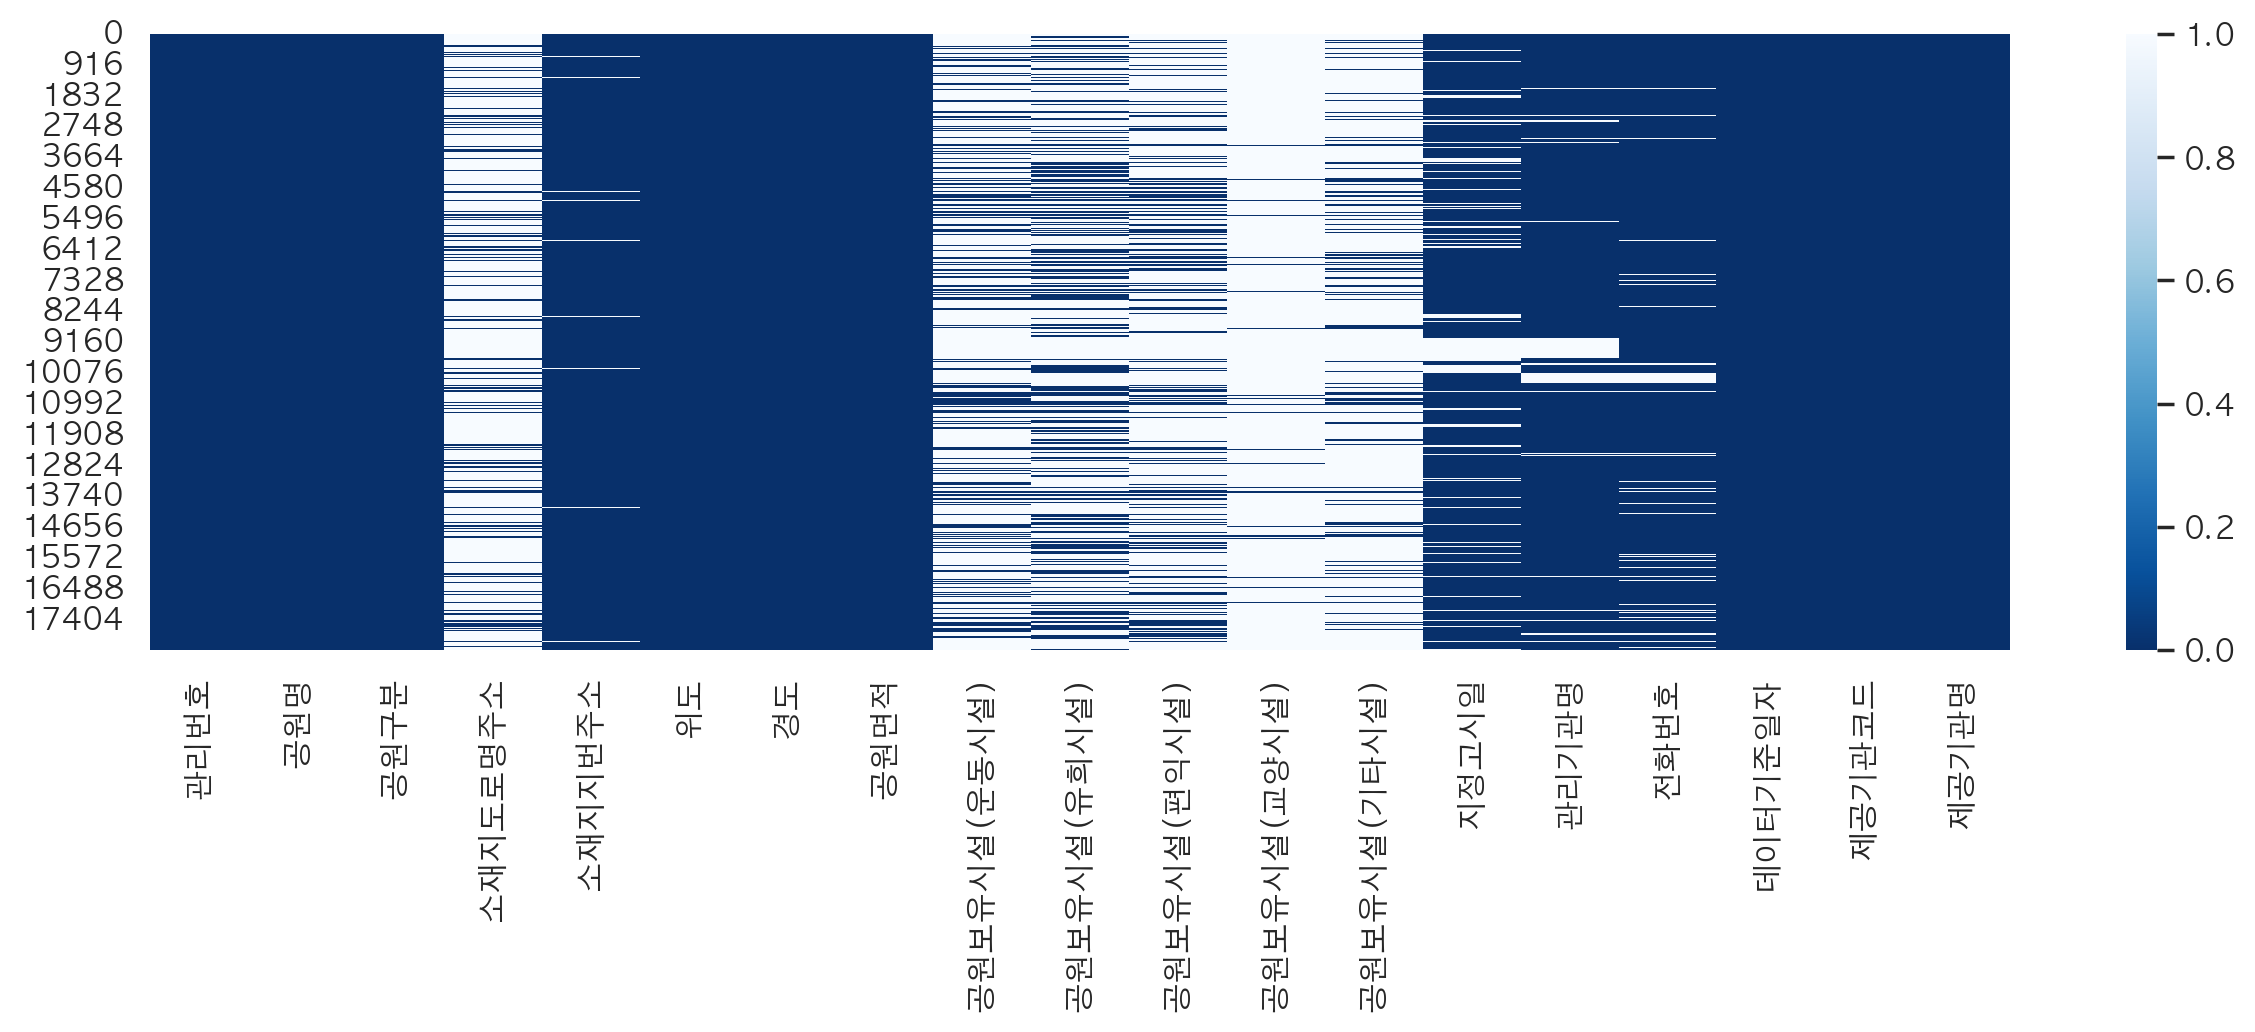

In [10]:
# seaborn 결측치 그래프
null = df.isnull()

plt.figure(figsize=(15, 4))
sns.heatmap(null, cmap="Blues_r")

In [11]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

## 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

In [12]:
# 도로명 주소의 널값 수
df['소재지도로명주소'].isnull().sum()

14642

In [13]:
# 지번 주소의 널값 수
df['소재지지번주소'].isnull().sum()

220

In [14]:
print(df.shape)
print(df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape)

(18302, 19)
(3440, 19)


In [15]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채운다
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])

In [16]:
# "소재지도로명주소"의 결측치수
df['소재지도로명주소'].isnull().sum()

0

In [17]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

## 파생변수 만들기
### 주소를 통한 시도, 구군 변수 생성하기

In [18]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기
df["시도"] = df["소재지도로명주소"].str.split(expand=True)[0]
df[["소재지도로명주소", "시도"]].head(3)

소재지도로명주소   시도
0     경기도 시흥시 능곡중앙로 85  경기도
1  경기도 양평군 용문면 광탄리 711  경기도
2  경기도 양평군 용문면 광탄리 762  경기도

In [19]:
# 구군 가져오기
df["구군"] = df["소재지도로명주소"].str.split(expand=True)[1]
df[["소재지도로명주소", "시도", "구군"]].sample(3)

소재지도로명주소     시도   구군
2764   경기도 성남시 중원구 은행동 2523    경기도  성남시
8952    대구광역시 수성구 신매동 579-1  대구광역시  수성구
10613    경기도 양주시 고암길 200-20    경기도  양주시

In [20]:
# 시도 데이터의 빈도수 세어보기
df["시도"].value_counts()

시도
경기도           4430
서울특별시         1939
충청남도          1699
경상남도          1224
전라남도          1035
경상북도           948
광주광역시          889
강원도            848
충청북도           789
인천광역시          732
부산광역시          693
전라북도           674
대구광역시          644
울산광역시          469
대전광역시          454
강원특별자치도        394
제주특별자치도        252
세종특별자치시         70
영월군             40
-               40
영덕군             26
강원특별자치도양구군       6
삼호읍              3
영암읍              1
삽호읍              1
인천광역시연수구         1
수원시              1
Name: count, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치 처리하기

<Axes: xlabel='경도', ylabel='위도'>

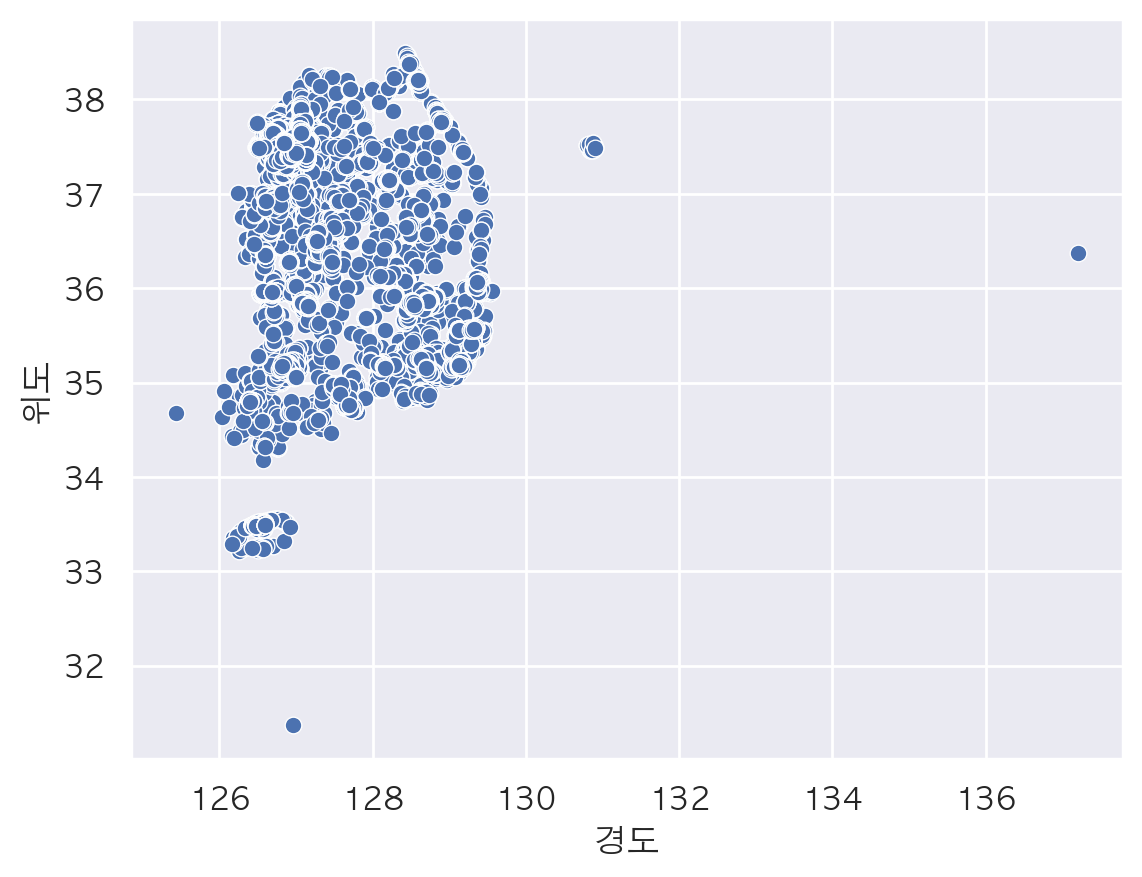

In [21]:
# 위경도 시각화
sns.scatterplot(data=df, x="경도", y="위도")

In [22]:
# 너무 위치를 벗어난 데이터(이상치)제거함 
df_park = df[(df["경도"] < 132) & 
             (df["위도"] > 32)].copy()

<Axes: xlabel='경도', ylabel='위도'>

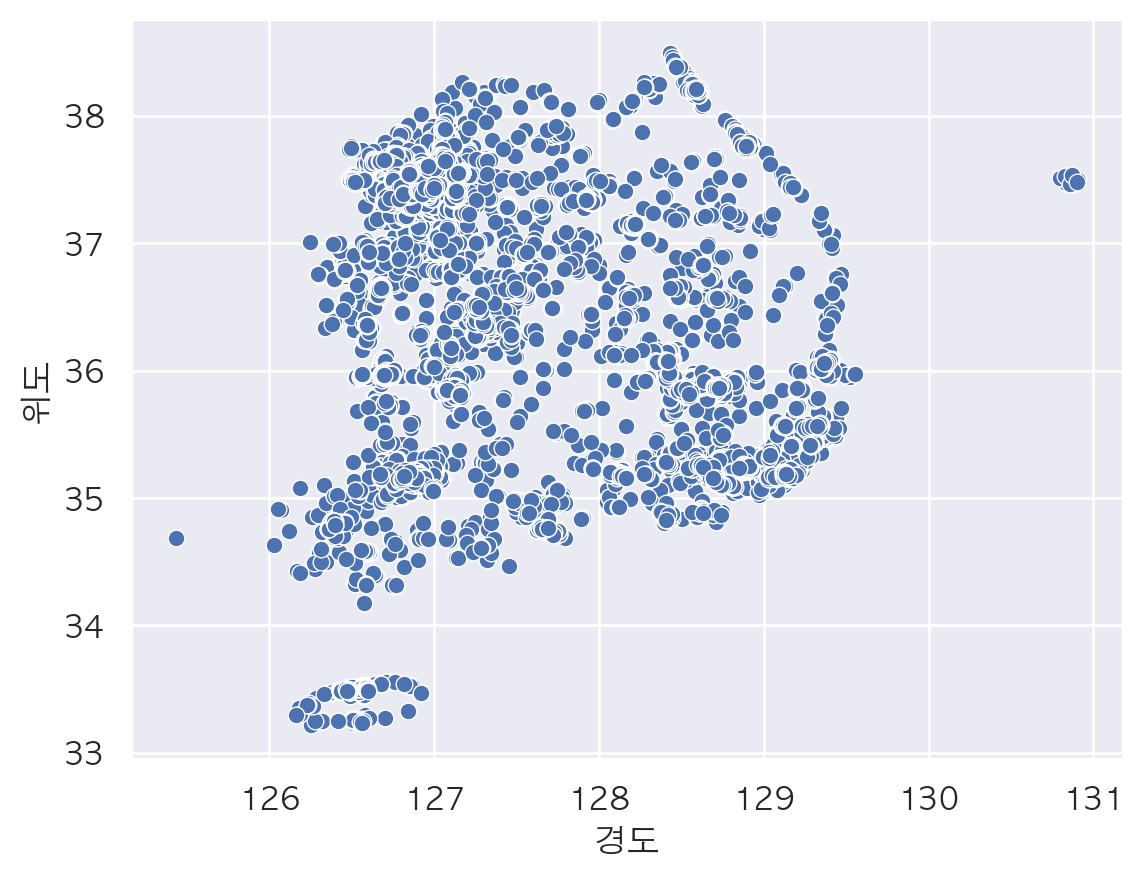

In [23]:

sns.scatterplot(data=df_park, x="경도", y="위도")

In [24]:
df[["위도", "경도"]].describe()

위도            경도
count  18300.000000  18300.000000
mean      36.551885    127.486688
std        1.040776      0.846742
min       31.373336    125.433012
25%       35.629650    126.874538
50%       36.828698    127.107025
75%       37.470749    128.134244
max       38.493170    137.202661

In [25]:
#아까 이상치 확인함 
#주소는 맞는데 위경도가 틀린듯 다시 받아오자 
df[(df["경도"] > 132) | (df["위도"] < 32)]

관리번호          공원명  공원구분                  소재지도로명주소  \
16474  43113-00080  근린공원5(만수공원)  근린공원  충청북도 청주시 흥덕구 오송읍 만수리 512   
16542  41173-00113      제24호소공원   소공원      경기도 안양시 동안구 호계동 1308   

                        소재지지번주소         위도          경도     공원면적 공원보유시설(운동시설)  \
16474  충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661  33258.0          NaN   
16542      경기도 안양시 동안구 호계동 1308  31.373336  126.954253   2159.0          NaN   

      공원보유시설(유희시설)  ... 공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일  \
16474          NaN  ...          NaN          NaN  2003-04-18   
16542          NaN  ...          NaN          NaN  2010-09-01   

                         관리기관명           전화번호     데이터기준일자   제공기관코드     제공기관명  \
16474  충청북도 청주시 푸른도시사업본부 공원관리과   043-201-4433  2020-07-16  5710000  충청북도 청주시   
16542            경기도 안양시 공원관리과  031-8045-5022  2022-11-15  3830000   경기도 안양시   

         시도   구군  
16474  충청북도  청주시  
16542   경기도  안양시  

[2 rows x 21 columns]

In [26]:
# 지정고시일은 object
df["지정고시일"].head(1)

0    2004-11-10
Name: 지정고시일, dtype: object

## 날짜 데이터 다루기

In [27]:
# 지정고시일의 데이터 타입을 datetime 형태로 변경
df["지정고시일"] = pd.to_datetime(df["지정고시일"])
df["지정고시일"].head(1)

0   2004-11-10
Name: 지정고시일, dtype: datetime64[ns]

In [28]:
df["고시연도"] = df["지정고시일"].dt.year
df["고시월"] = df["지정고시일"].dt.month

df[["지정고시일", "고시연도", "고시월"]].head()

지정고시일    고시연도   고시월
0 2004-11-10  2004.0  11.0
1 1994-02-25  1994.0   2.0
2 1994-02-25  1994.0   2.0
3 2012-11-22  2012.0  11.0
4 2012-08-30  2012.0   8.0

/var/folders/1s/7yblwm1x1sx198v0mh4s1tg40000gn/T/ipykernel_34134/446862042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"], rug=True)


<Axes: xlabel='고시연도', ylabel='Density'>

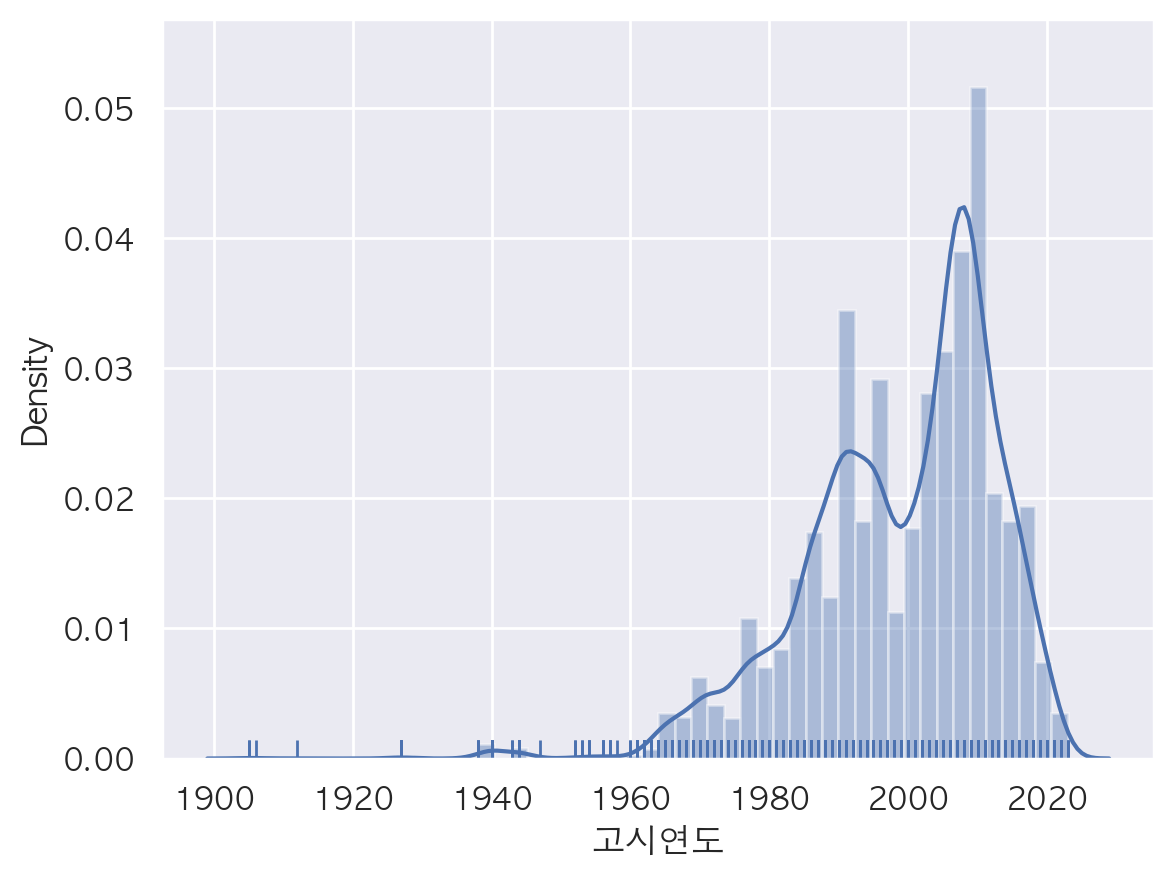

In [29]:
sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"], rug=True)

In [30]:
year_month = pd.pivot_table(df, index="고시연도", columns="고시월", 
               values="공원명", aggfunc="count")
year_month = year_month[(year_month.index > 2000) & 
                        (year_month.index < 2019)]
year_month.astype(int).style.background_gradient()

## 텍스트 데이터 다루기
### 정규표현식 

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [31]:
# 정규표현식 라이브러리
import re

In [32]:
# options.display 를 사용해 max_columns 값을 채워줍니다.
pd.options.display.max_columns = 100

In [33]:
df.head(1)

관리번호   공원명  공원구분          소재지도로명주소          소재지지번주소         위도  \
0  41390-00084  승지공원  근린공원  경기도 시흥시 능곡중앙로 85  경기도 시흥시 능곡동 552  37.371378   

           경도     공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설)  \
0  126.813132  10842.0          NaN        조합놀이대          NaN          도서관   

  공원보유시설(기타시설)      지정고시일     관리기관명          전화번호     데이터기준일자   제공기관코드  \
0          NaN 2004-11-10  경기도 시흥시청  031-310-3869  2022-11-28  4010000   

     제공기관명   시도   구군    고시연도   고시월  
0  경기도 시흥시  경기도  시흥시  2004.0  11.0

In [34]:
df["공원보유시설(운동시설)"].value_counts(sort=False).head(5)

공원보유시설(운동시설)
농구장+축구장+테니스장      2
게이트볼장            58
농구장+배드민턴장        12
운동공간              1
체력단련시설          338
Name: count, dtype: int64

In [35]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만듭니다.
# 그리고 다시 str 형태로 변경하고 gym 이라는 변수에 담습니다.
gym = df["공원보유시설(운동시설)"].unique().tolist()
gym = str(gym)
gym[:1000]

"[nan, '농구장+축구장+테니스장', '게이트볼장', '농구장+배드민턴장', '운동공간', '체력단련시설', '족구장+배구장', '다목적운동장', '배드민턴장+게이트볼장', '농구장+풋살경기장+체육시설+인라인트랙', '체육시설', '체육시설+농구장', '야외헬스기구', '배드민턴장', '역기내리기운동+역기올리기운동+양다리운동+옆파도타기운동', '역기내리기운동+역기올리기운동+노젓기운동+허리돌리기운동+양다리운동+옆파도타기운동+원그리기운동', '달리기+아래로당기기+앞으로밀기+체어풀+허리돌리기+공중걷기+윗몽일으키기+등허리지압기+하체흔들기온몸근육풀기', '등허리지압기+온몸근육풀기', '마라톤운동+양다리운동+등허리근육풀기운동+옆파도타기운동', '역기올리기운동+양다리운동+옆파도타기운동+원그리기운동', '노젓기운동+허리돌리기운동+양다리운동+옆파도타기운동+원그리기운동', '역기내리운동+역기올리기운동+양다리운동+옆파도타기운동', '역기내리기운동+역기올리기운동+양다리운동+옆파도타기운동+원그리기운동', '허리돌리기 외 2종', '어깨근육풀기 외 2종', '배드민턴 지주대  등', '배근력대 외 2종', '배근력대 외 3종', '하체흔들기 외 12종', '양팔줄당기기외 5종', '하체흔들기 외 7종', '허리돌리기 외 8종', '온몸근육풀기 외 20종', '게이트볼장+농구장 등', '축구장+족구장+조정경기장', '엑스게임장', '배드민턴장+농구장', '철봉', '야외헬스기구+족구장', '야외운동기구 4', '축구장 1, 다목적구장 2, 야외운동기구 13', '야외운동기구 5', '야외운동기구 6', '야외운동기구 11', '허리돌리기', '공중걷기', '운동시설6', '운동시설8', '온몸근육풀기1,궁중걷기1,허리돌리기1', '하늘걷기1,마라톤운동1,온몸근육풀기1', '온몸역기올리기1,온몸근육풀기1', '로라마사지기머신1,오버헤드폴리머신1', '허리돌리기2', '철봉+팔굽혀펴기+평행봉+허리돌리기+배근력대', '스텝싸이클+체어플+트윈바디싣업', '다목적구장', '테니스장+배드민턴장

In [36]:
# replace 기능을 사용해서 +로 이어져있는 것들을 다 분리함 (,로만듬)
gym = gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("/", ",")
gym[:1000]

'[nan,,,농구장,축구장,테니스장,,,,게이트볼장,,,,농구장,배드민턴장,,,,운동공간,,,,체력단련시설,,,,족구장,배구장,,,,다목적운동장,,,,배드민턴장,게이트볼장,,,,농구장,풋살경기장,체육시설,인라인트랙,,,,체육시설,,,,체육시설,농구장,,,,야외헬스기구,,,,배드민턴장,,,,역기내리기운동,역기올리기운동,양다리운동,옆파도타기운동,,,,역기내리기운동,역기올리기운동,노젓기운동,허리돌리기운동,양다리운동,옆파도타기운동,원그리기운동,,,,달리기,아래로당기기,앞으로밀기,체어풀,허리돌리기,공중걷기,윗몽일으키기,등허리지압기,하체흔들기온몸근육풀기,,,,등허리지압기,온몸근육풀기,,,,마라톤운동,양다리운동,등허리근육풀기운동,옆파도타기운동,,,,역기올리기운동,양다리운동,옆파도타기운동,원그리기운동,,,,노젓기운동,허리돌리기운동,양다리운동,옆파도타기운동,원그리기운동,,,,역기내리운동,역기올리기운동,양다리운동,옆파도타기운동,,,,역기내리기운동,역기올리기운동,양다리운동,옆파도타기운동,원그리기운동,,,,허리돌리기,외,2종,,,,어깨근육풀기,외,2종,,,,배드민턴,지주대,,등,,,,배근력대,외,2종,,,,배근력대,외,3종,,,,하체흔들기,외,12종,,,,양팔줄당기기외,5종,,,,하체흔들기,외,7종,,,,허리돌리기,외,8종,,,,온몸근육풀기,외,20종,,,,게이트볼장,농구장,등,,,,축구장,족구장,조정경기장,,,,엑스게임장,,,,배드민턴장,농구장,,,,철봉,,,,야외헬스기구,족구장,,,,야외운동기구,4,,,,축구장,1,,다목적구장,2,,야외운동기구,13,,,,야외운동기구,5,,,,야외운동기구,6,,,,야외운동기구,11,,,,허리돌리기,,,,공중걷기,,,,운동시설6,,,,운동시설8,,,,온몸근육풀기1,궁중걷기1,허리돌리기1,,,,하늘걷기1,마라톤운동1,온몸근육풀기1,,,,온몸역기올리기1,온몸근육풀기1,,,,로라마사지기머신1,오버헤드폴리머신1,,,,허리돌리기2,,,,철봉,팔굽혀펴기,평행봉,허리돌리기,배근력대,,,,스텝싸이클,체어플,트윈바디싣업,,,,다목적구장,,,,테니스장,배드민턴장

In [37]:
gym = re.sub("[\[\d\-nan\.\]]", "", gym)
gym = re.sub(",{2,}", ",", gym)
gym[:1000]

',농구장,축구장,테니스장,게이트볼장,농구장,배드민턴장,운동공간,체력단련시설,족구장,배구장,다목적운동장,배드민턴장,게이트볼장,농구장,풋살경기장,체육시설,인라인트랙,체육시설,체육시설,농구장,야외헬스기구,배드민턴장,역기내리기운동,역기올리기운동,양다리운동,옆파도타기운동,역기내리기운동,역기올리기운동,노젓기운동,허리돌리기운동,양다리운동,옆파도타기운동,원그리기운동,달리기,아래로당기기,앞으로밀기,체어풀,허리돌리기,공중걷기,윗몽일으키기,등허리지압기,하체흔들기온몸근육풀기,등허리지압기,온몸근육풀기,마라톤운동,양다리운동,등허리근육풀기운동,옆파도타기운동,역기올리기운동,양다리운동,옆파도타기운동,원그리기운동,노젓기운동,허리돌리기운동,양다리운동,옆파도타기운동,원그리기운동,역기내리운동,역기올리기운동,양다리운동,옆파도타기운동,역기내리기운동,역기올리기운동,양다리운동,옆파도타기운동,원그리기운동,허리돌리기,외,종,어깨근육풀기,외,종,배드민턴,지주대,등,배근력대,외,종,배근력대,외,종,하체흔들기,외,종,양팔줄당기기외,종,하체흔들기,외,종,허리돌리기,외,종,온몸근육풀기,외,종,게이트볼장,농구장,등,축구장,족구장,조정경기장,엑스게임장,배드민턴장,농구장,철봉,야외헬스기구,족구장,야외운동기구,축구장,다목적구장,야외운동기구,야외운동기구,야외운동기구,야외운동기구,허리돌리기,공중걷기,운동시설,운동시설,온몸근육풀기,궁중걷기,허리돌리기,하늘걷기,마라톤운동,온몸근육풀기,온몸역기올리기,온몸근육풀기,로라마사지기머신,오버헤드폴리머신,허리돌리기,철봉,팔굽혀펴기,평행봉,허리돌리기,배근력대,스텝싸이클,체어플,트윈바디싣업,다목적구장,테니스장,배드민턴장,체육시설,체육시설물,농구대,체율시설물,족구장,농구대,체육시설물,체력단련장,농구장,크로스컨트리,다목적광장,체력단련시설,종,풋살경기장,족구장,게이트볼장,풋살장,인라인장(X게임장),풋살장,배드민턴장,농구장,족구장,족구장,족구장,등,배드민턴장,족구장,체력단련장,등,잔디광장,배드민턴장,국궁장,체력단련장,골프연습장,다목적운동장,배구장,체력단련시설,배드민턴장,게이트볼장,다목적운동장,체력단련장

In [38]:
gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장      278
농구장        258
하늘걷기       248
온몸허리돌리기    220
운동기구       169
Name: count, dtype: int64

<Axes: >

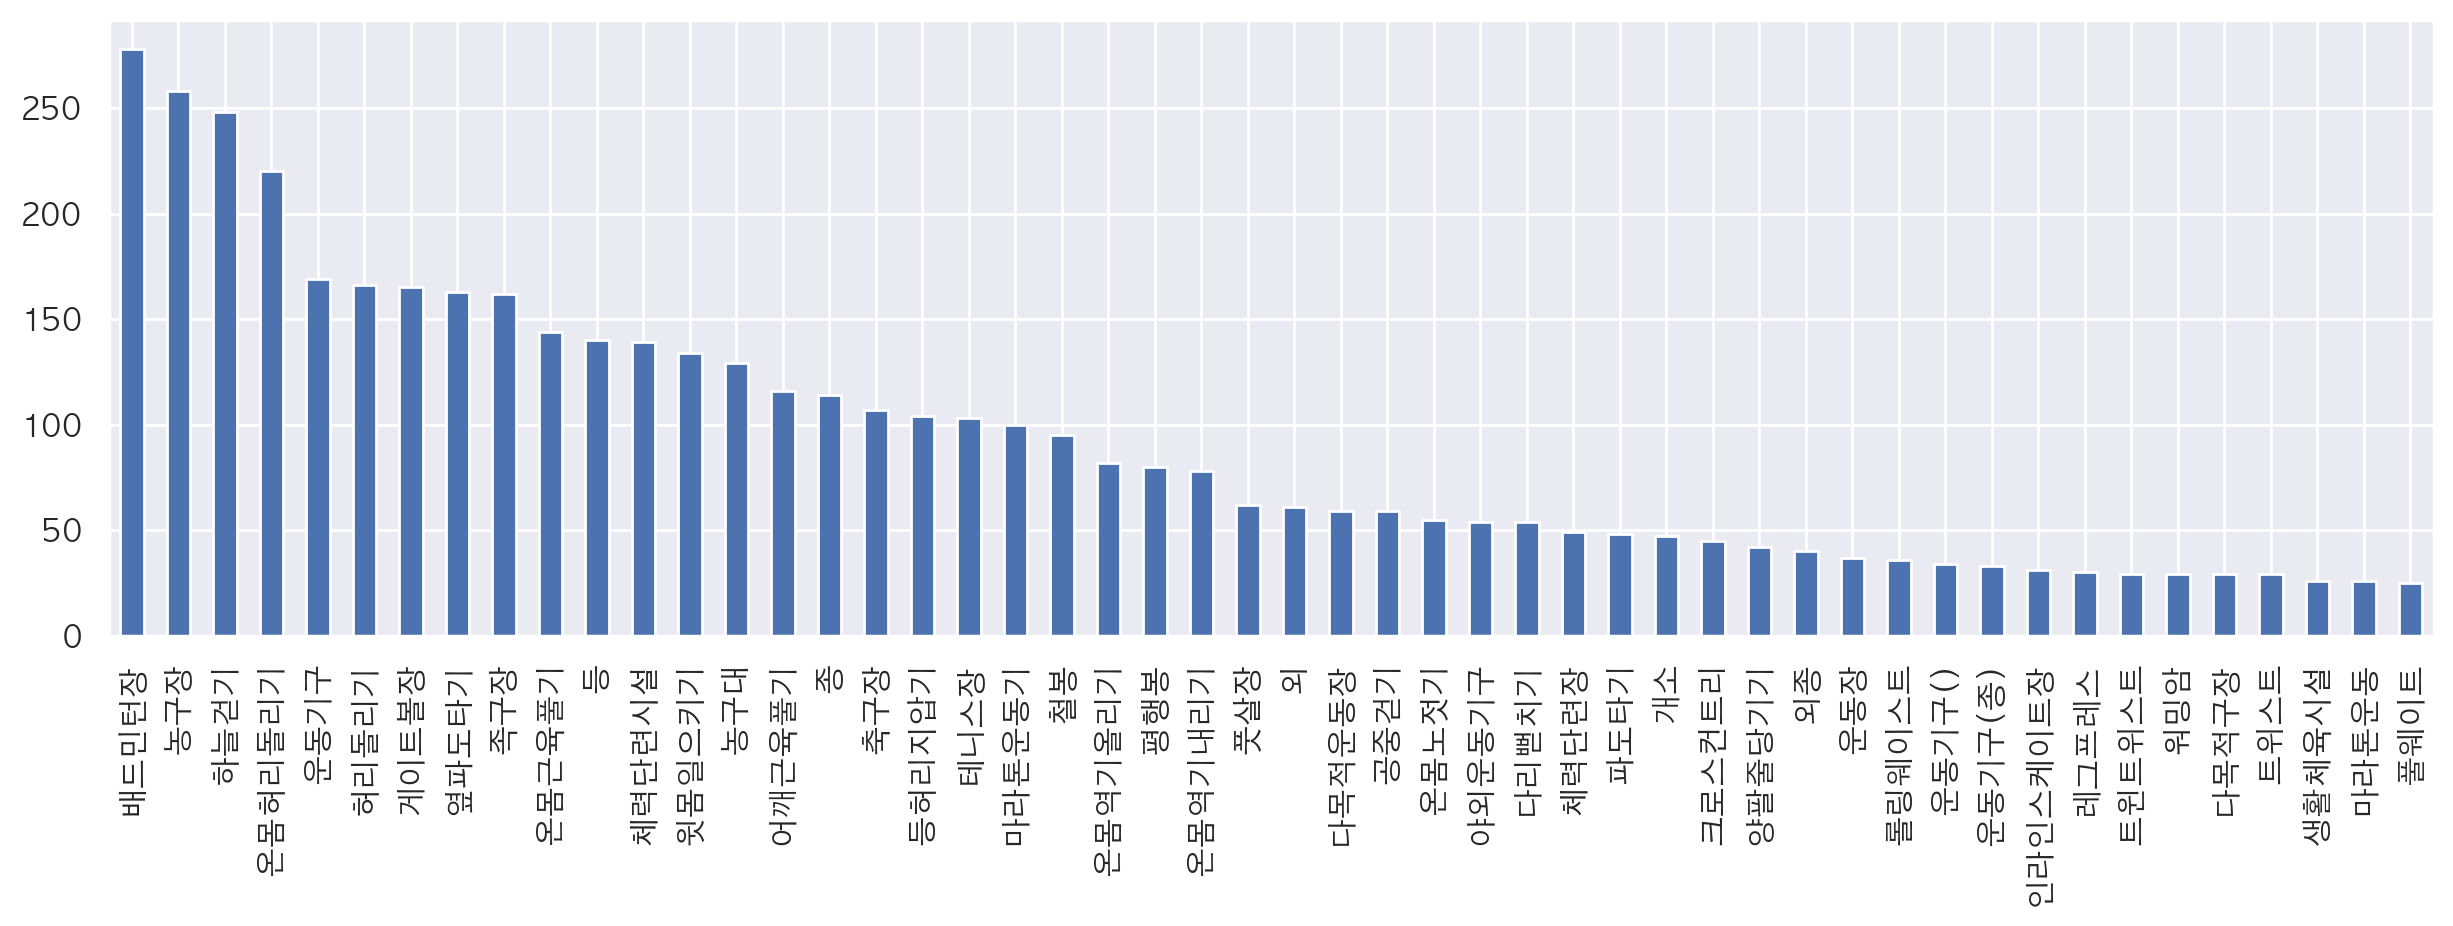

In [39]:
gym_count.head(50).plot.bar(figsize=(15, 4))

### 워드클라우드로 빈도수 표현하기

In [40]:

from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path='/Library/Fonts/AppFonts/Arial Unicode.ttf', 
        width=width, height=height,
        stopwords=["운동기구", "개소", "외종"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

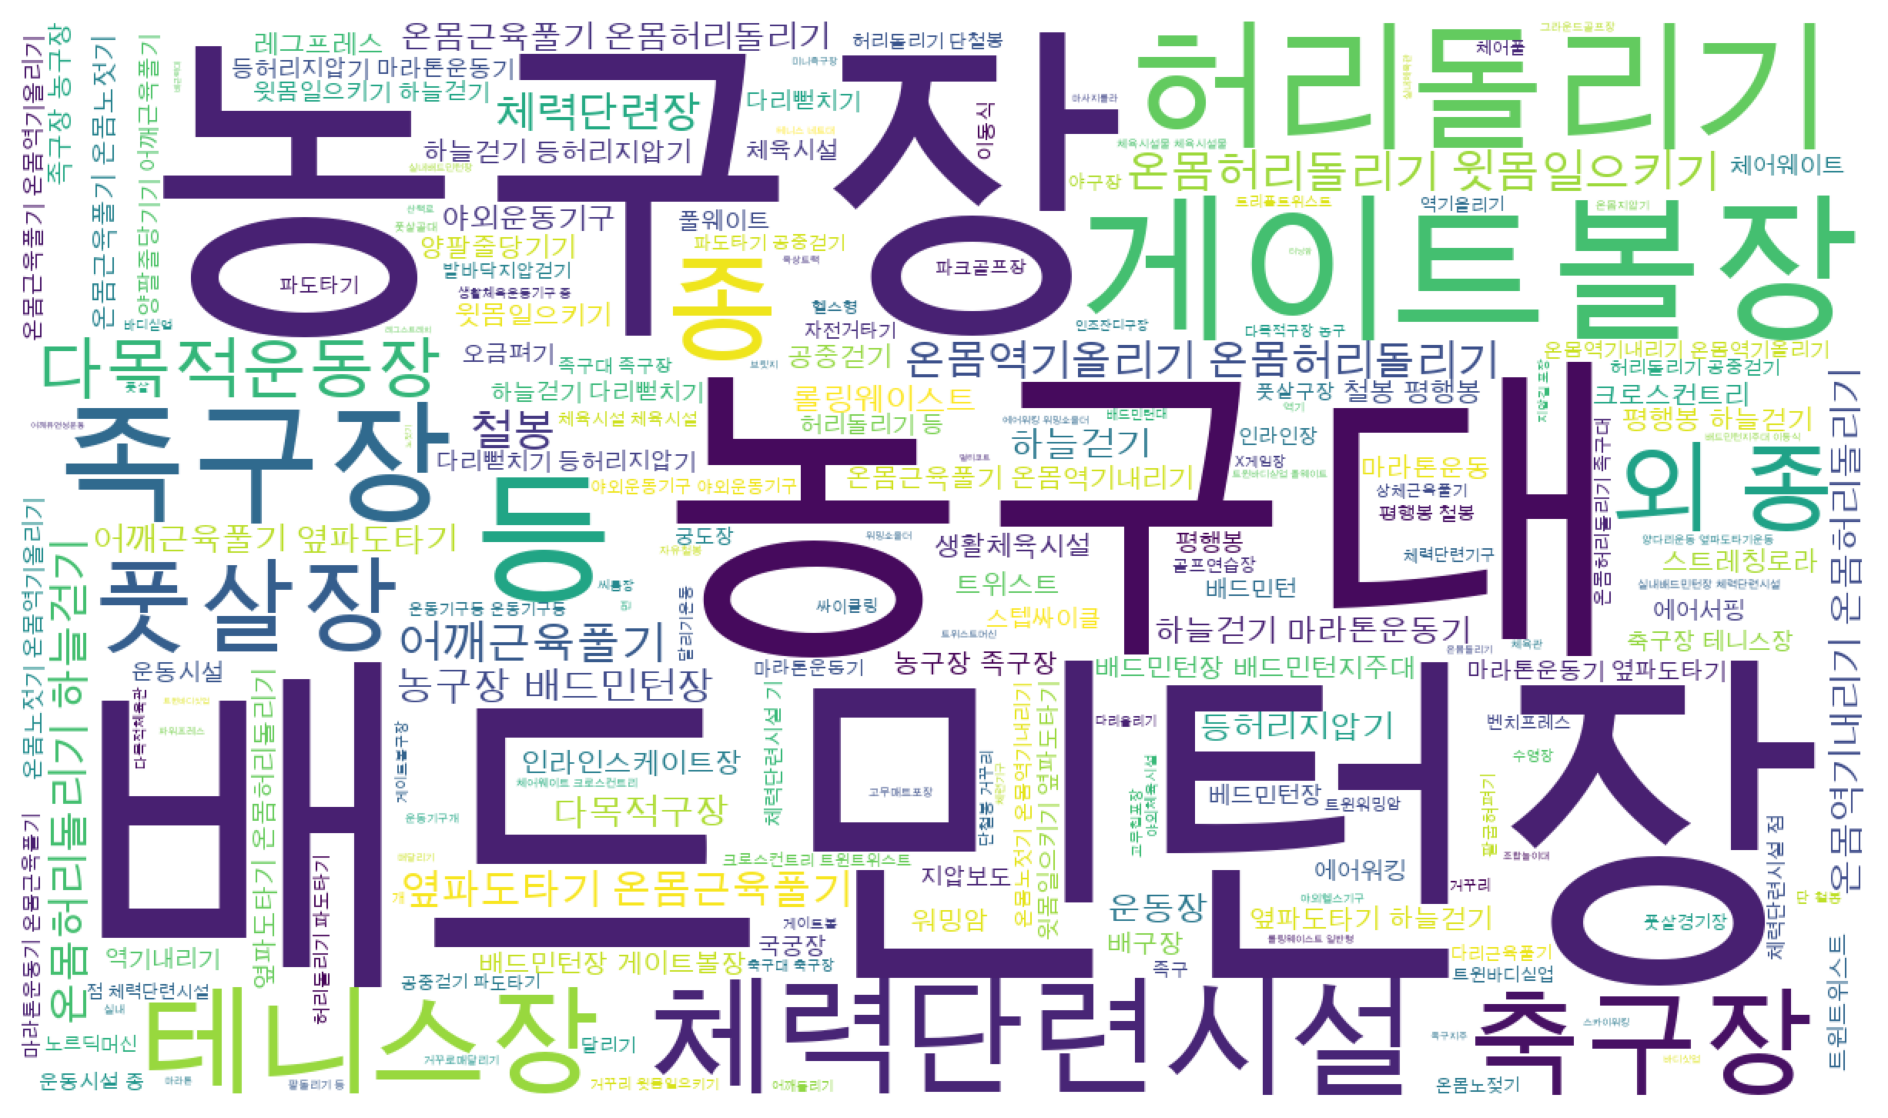

In [41]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.
wordcloud(gym, width=1200, height=700)

In [42]:
def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text = re.sub(" ", "", text)
    text = re.sub(",{2,}", ",", text)
    
    text = text.replace("+", ",")
    return text

In [43]:
get_string("[1. '화장실' 5, 2. 주차장, -, nan, /]")

'화장실,주차장,'

In [44]:
get_string(np.nan)

nan

In [45]:
df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [46]:
df["편익시설"].value_counts().tail()

편익시설
없음                     1
파고라,그네의자               1
주차장개소,섬호정개소,공중화장실개소    1
화장실,파고라,정자,의자          1
전망데크개소                 1
Name: count, dtype: int64

In [47]:
type(np.nan)

float

In [48]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결
fac = ",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,주차장,화장실,주차장,화장실,관리사무소,주차장,화장실,무대,화장실,주차장,음수대,음수대,음수대,음수대,음수대,음수대,음수대'

In [49]:
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환
fac = str(df["편익시설"].tolist())
fac = get_string(fac)
fac[:100]

',화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,주차장,화장실,주차장,화장실,관리사무소,주차장,화장실,무대,화장실,주차장,음수대,음수대,음수대,음수대,음수대,음수대,음수'

In [50]:
# ,가 2개 이상 들어가면 하나로
re.sub(",{2,}", ",", '화장실,주차장,,,')

'화장실,주차장,'

In [51]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1944
파고라    1317
벤치      633
평의자     504
의자      499
Name: count, dtype: int64

<Axes: >

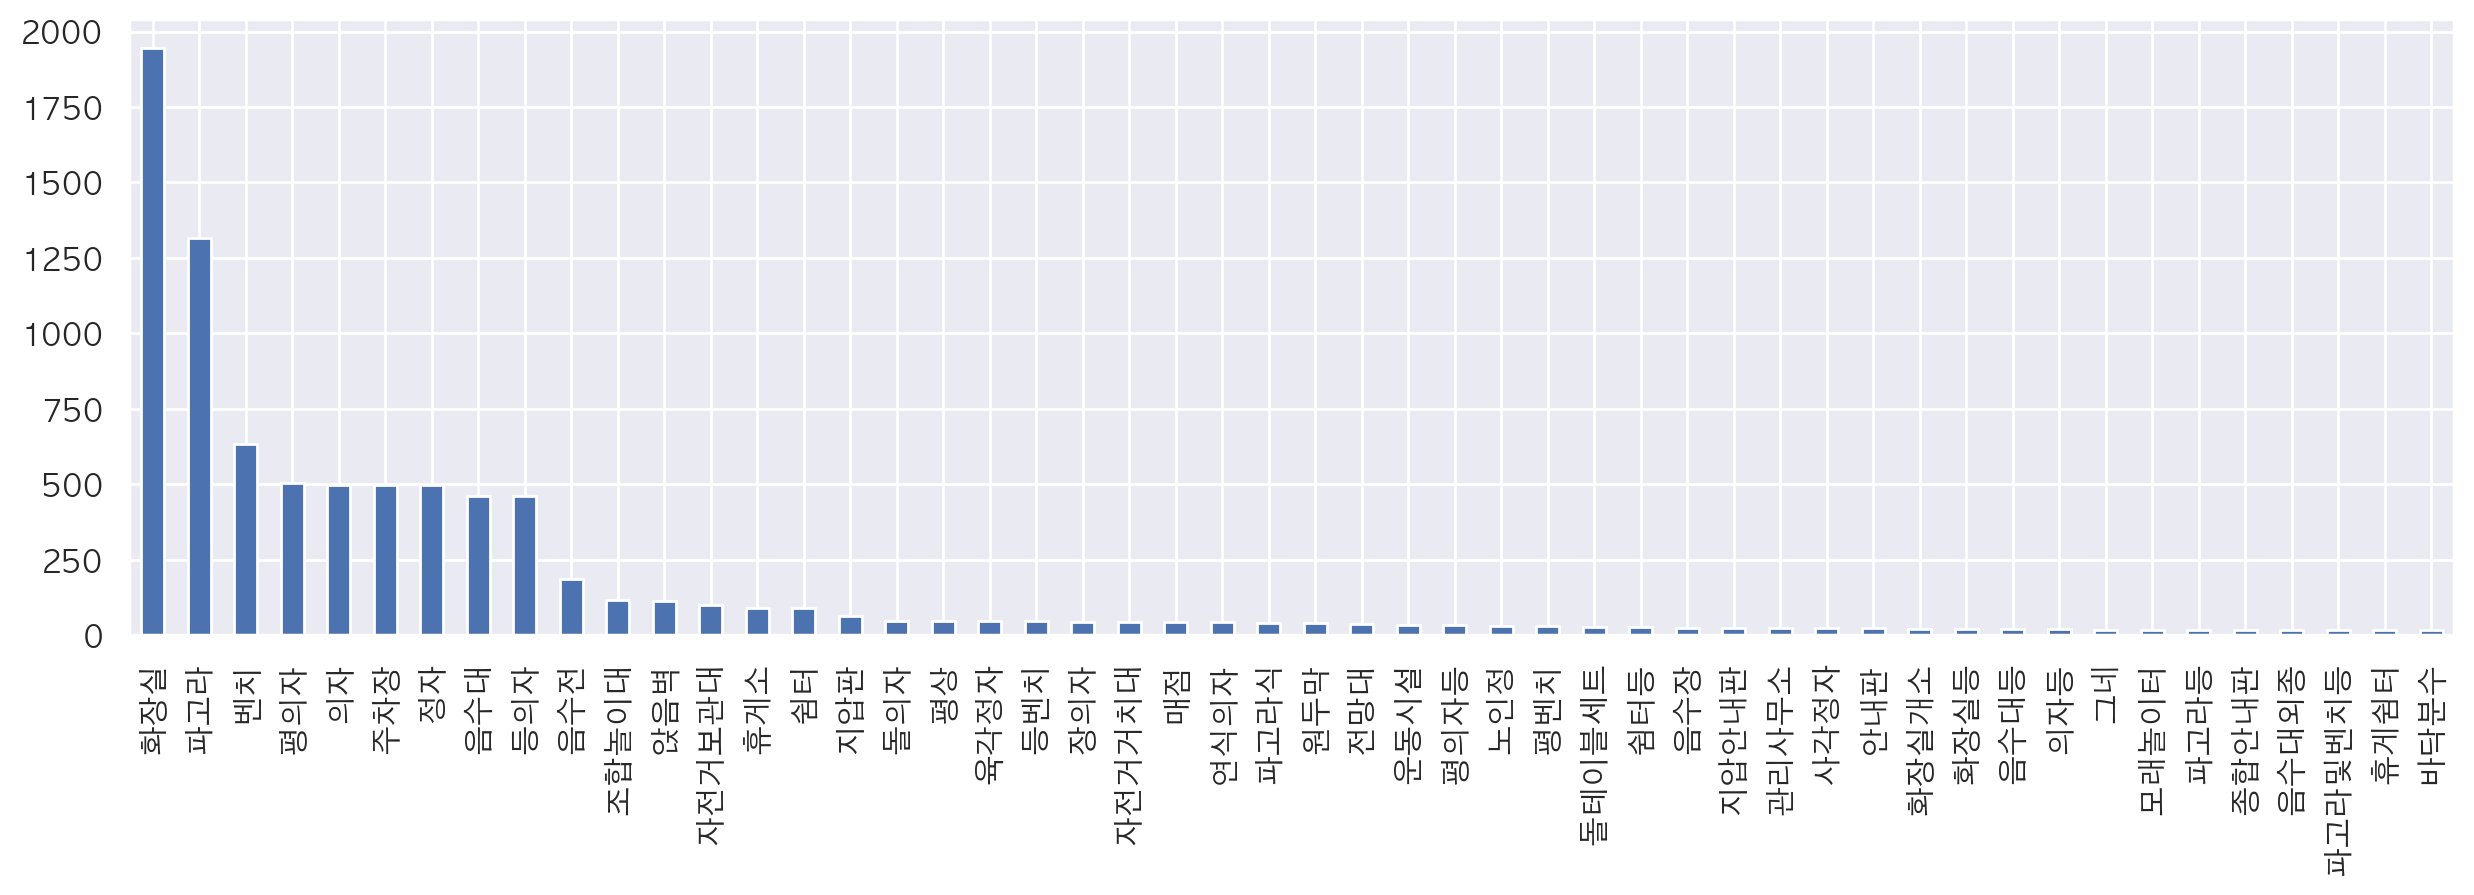

In [52]:
fac_count.head(50).plot.bar(figsize=(15, 4))

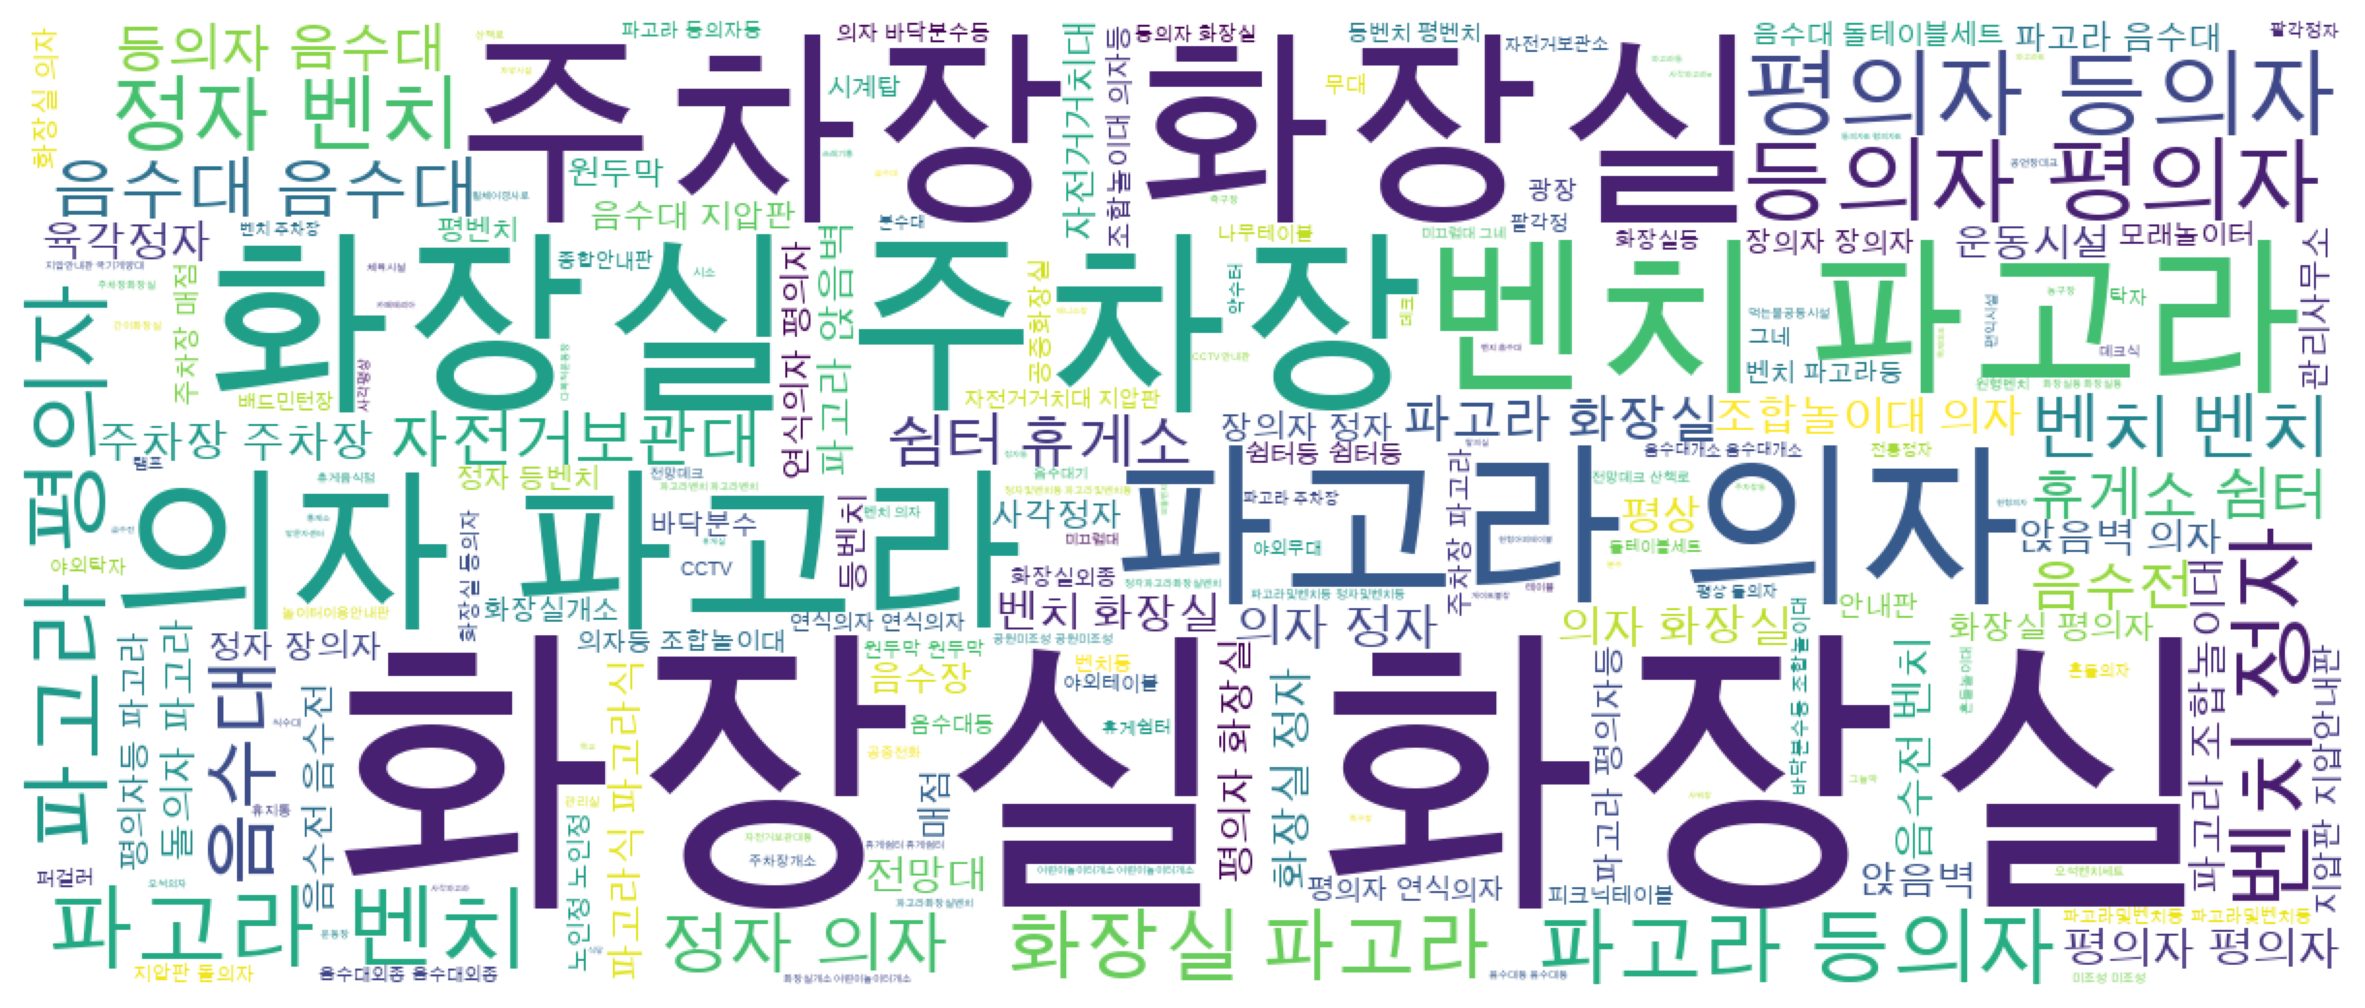

In [53]:
wordcloud(fac)

### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [54]:
facilities = ["화장실", "주차장", "음수", "파고라", "정자", 
              "벤치", "의자", "놀이터", "축구장", "야영장", "CCTV"]

df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [55]:
# 해당 단어가 들어가면 True, 아니면 False
for f in facilities:
    df[f] = df_fac["공원보유시설(편익시설)"].str.contains(f)

In [56]:
df2 = df[facilities].sum()

df2

화장실     2069
주차장      509
음수       750
파고라     1441
정자       598
벤치       768
의자      1330
놀이터       34
축구장        6
야영장        2
CCTV      15
dtype: object


## 특정 정보 마스킹
### 전화번호 마스킹

In [57]:
re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-1234-5678")

'010-12**-**78'

In [58]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-5678"

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-123-5678")

'010-1**-**78'

In [59]:
# 가운데가 2자리일 때는 마스킹 없이 보이는지 확인하기 "010-12-5678"

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-12-5678")

'010-12-5678'

In [60]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "+82-10-1234-5678")

'+82-10-1234-5678'

In [61]:
phone = "+82-10-1234-5678"

def mask_phone_number(phone):
    
    if pd.isnull(phone):
        return phone
    
    num = phone.split("-")
    num_len = len(num) // 2
    
    num[num_len] = re.sub("\w", "*", num[num_len])
    num[-1] = re.sub("(\d{2})(\d{2})", r"**\2", num[-1])
    
    return "-".join(num)

mask_phone_number(phone)

'+82-10-****-**78'

In [62]:
mask_phone_number(np.nan)

nan

In [63]:
df["전화번호(전처리)"] = df["전화번호"].map(mask_phone_number)
df[["공원명", "전화번호", "전화번호(전처리)"]].sample(10)

공원명           전화번호      전화번호(전처리)
10338      삼가지구 어린이공원2            NaN            NaN
3874               무궁화   02-2680-6298   02-****-**98
3702   공현진 농어촌마을 다목적광장   033-680-3423   033-***-**23
8931             북평4공원   033-560-2132   033-***-**32
6532            구 역전공원   041-950-4438   041-***-**38
13254          구산동마을공원    02-350-5248    02-***-**48
2871              새터공원   053-665-2864   053-***-**64
6522              장암공원   041-950-4438   041-***-**38
8742              바다공원   051-970-4536   051-***-**36
9318        남양5호 어린이공원  031-5189-6626  031-****-**26

### 이메일 주소 마스킹


In [64]:
email = "address@mail.com"

re.sub("[^@.]", "x", email)

'xxxxxxx@xxxx.xxx'

In [65]:
email = "address@mail.com"

address, domain = email.split("@")
mask = re.sub("\w", "*", address[1:-1])
print(f"{address[0]}{mask}{address[-1]}@{domain}")
print(email)

a*****s@mail.com
address@mail.com


In [66]:
def mask_email(email):
    address, domain = email.split("@")
    mask = re.sub("\w", "*", address[1:-1])
    return f"{address[0]}{mask}{address[-1]}@{domain}"
    
mask_email(email)

'a*****s@mail.com'

In [67]:
mask_email("1234address_123@gmail.com")

'1*************3@gmail.com'

### 자동차 등록번호 마스킹

In [68]:
car_num = "32가1234"
re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])", r"*\2\3**\5", car_num)

'3*가1**4'

In [69]:
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."

re.sub("([0-9])([가-힣])([\d])([\d]{2})([\d])", r"*\2\3**\5", car_num)

'안녕하세요. 자동차 등록 번호는 13*가1**4 입니다.'

# 데이터 요약하기
## 수치형, 범주형 변수 구분하기

In [70]:
data_types = df.dtypes
data_types[:5]

관리번호        object
공원명         object
공원구분        object
소재지도로명주소    object
소재지지번주소     object
dtype: object

## 수치형 변수 요약

In [71]:
# 수치형 변수 구하기
var_numbers = data_types[data_types != "object"]
var_numbers = var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

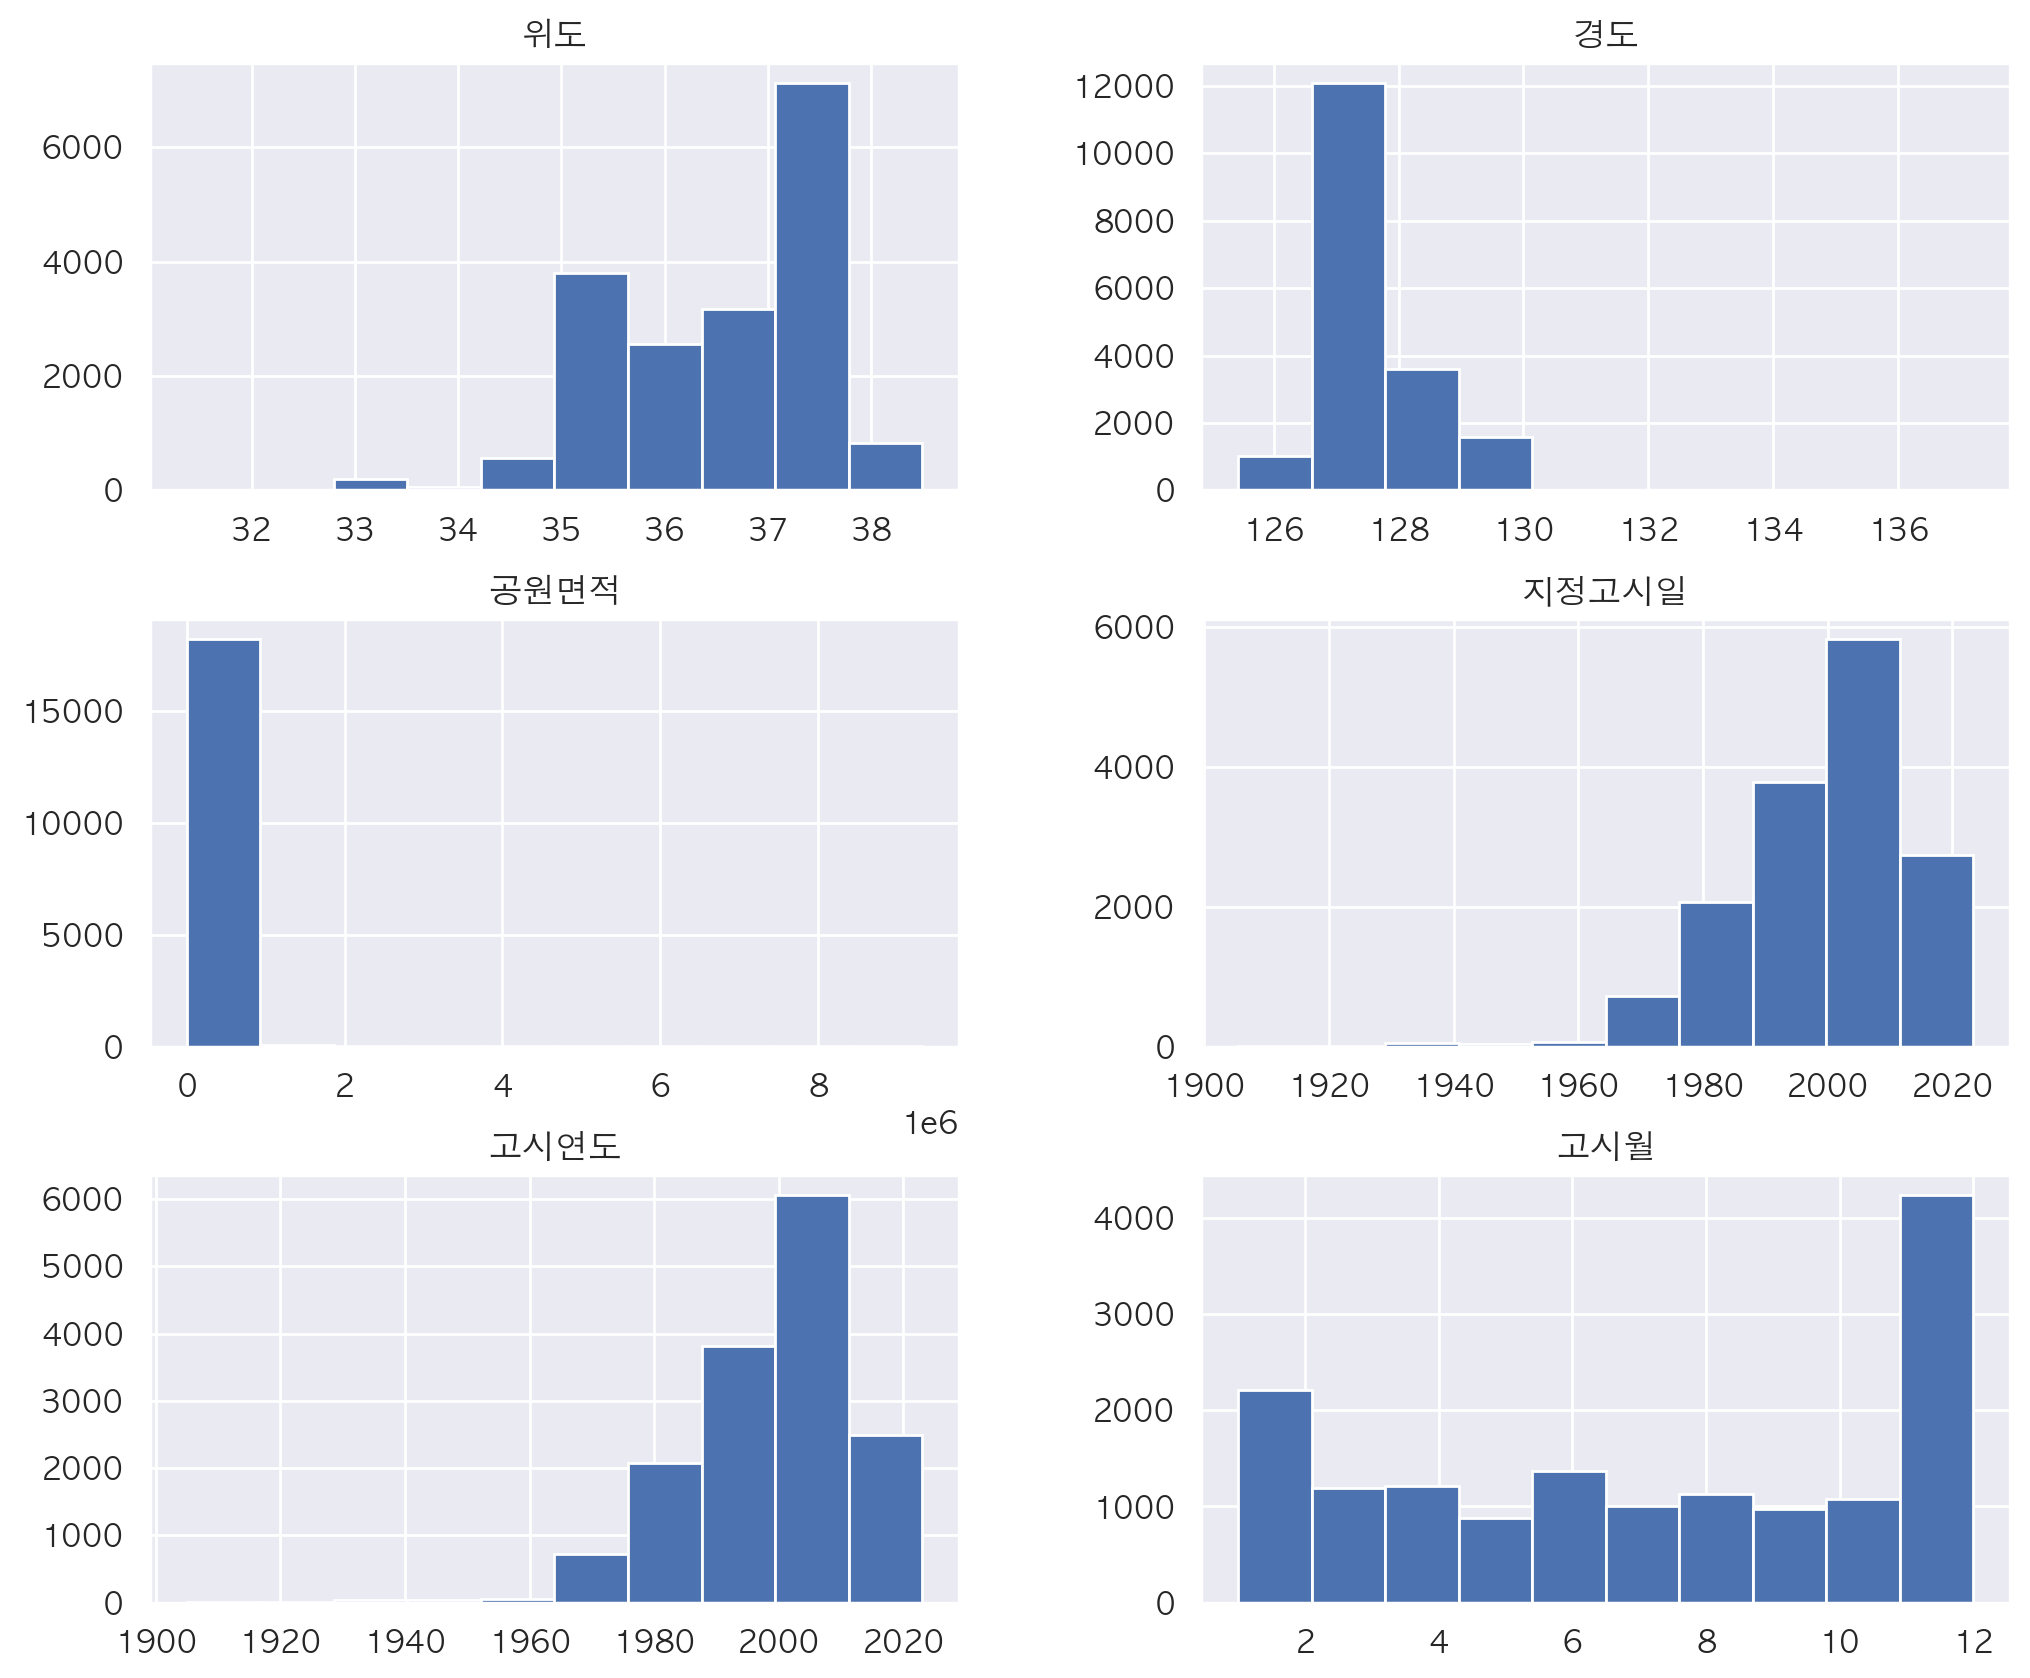

In [72]:
# 히스토그램
h = df.hist(figsize=(12, 10))

In [73]:
df.describe()

위도            경도          공원면적  \
count  18300.000000  18300.000000  1.830200e+04   
mean      36.551885    127.486688  3.275092e+04   
min       31.373336    125.433012  0.000000e+00   
25%       35.629650    126.874538  1.501700e+03   
50%       36.828698    127.107025  2.221000e+03   
75%       37.470749    128.134244  1.020612e+04   
max       38.493170    137.202661  9.320660e+06   
std        1.040776      0.846742  2.158995e+05   

                               지정고시일          고시연도           고시월  
count                          15292  15292.000000  15292.000000  
mean   1999-08-27 01:18:15.160868480   1999.100772      7.123136  
min              1905-06-19 00:00:00   1905.000000      1.000000  
25%              1990-12-24 00:00:00   1990.000000      4.000000  
50%              2002-11-18 00:00:00   2002.000000      7.000000  
75%              2009-09-02 00:00:00   2009.000000     11.000000  
max              2023-05-17 00:00:00   2023.000000     12.000000  
std                              NaN     13.612334      3.718507

## 범주형 변수 요약

In [74]:
# 범주형 변수
var_objects = data_types[data_types == "object"]
var_objects = var_objects.index.tolist()
var_objects[:5]

['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소']

In [75]:
df.describe(include="object")

관리번호    공원명   공원구분 소재지도로명주소                    소재지지번주소  \
count         18302  18302  18302    18302                      18082   
unique        16681  13783     16    16861                      16745   
top     42780-00000  어린이공원  어린이공원  경기도 시흥시  전라북도 전주시 덕진구 송천동2가 377-66   
freq             44    257   9453       95                          8   

       공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설) 공원보유시설(기타시설)  \
count          5102         6484         5094          757         2766   
unique         1918         1356         1418          342         1100   
top          체력단련시설        조합놀이대          화장실         야외무대     조경시설,산책로   
freq            338         1531          908           75          116   

           관리기관명           전화번호     데이터기준일자   제공기관코드  제공기관명     시도     구군  \
count      16935          17171       18302    18302  18302  18302  18262   
unique       326            577         171      252    252     27    267   
top     경기도 평택시청  031-8024-4248  2022-03-30  6440000   충청남도    경기도    화성시   
freq         535            535         953      953    953   4430    592   

        편익시설    화장실    주차장     음수    파고라     정자     벤치     의자    놀이터    축구장  \
count   5094   5094   5094   5094   5094   5094   5094   5094   5094   5094   
unique  1002      2      2      2      2      2      2      2      2      2   
top      화장실  False  False  False  False  False  False  False  False  False   
freq    1007   3025   4585   4344   3653   4496   4326   3764   5060   5088   

          야영장   CCTV      전화번호(전처리)  
count    5094   5094          17171  
unique      2      2            449  
top     False  False  031-****-**48  
freq     5092   5079            535

## crosstab
* 범주형 변수끼리의 빈도수 구하기

In [77]:
manage_category = pd.crosstab(index=df["관리기관명"], columns=df["공원구분"])
manage_category[manage_category["체육공원"] > 5].style.background_gradient()

In [79]:
city_category = pd.crosstab(index=df["시도"], columns=df["공원구분"])
city_category.style.background_gradient()

# 시도별 공원 분포

In [80]:
# 시도별로 합계 데이터를 출력
city_count = df["시도"].value_counts().to_frame()
city_mean = df["시도"].value_counts(normalize=True).to_frame()
city_count.head()

count
시도          
경기도     4430
서울특별시   1939
충청남도    1699
경상남도    1224
전라남도    1035

In [81]:
city = city_count.merge(city_mean, left_index=True, right_index=True)
city.columns = ["합계", "비율"]
city.style.background_gradient()

## 공원구분별 분포

<Axes: xlabel='경도', ylabel='위도'>

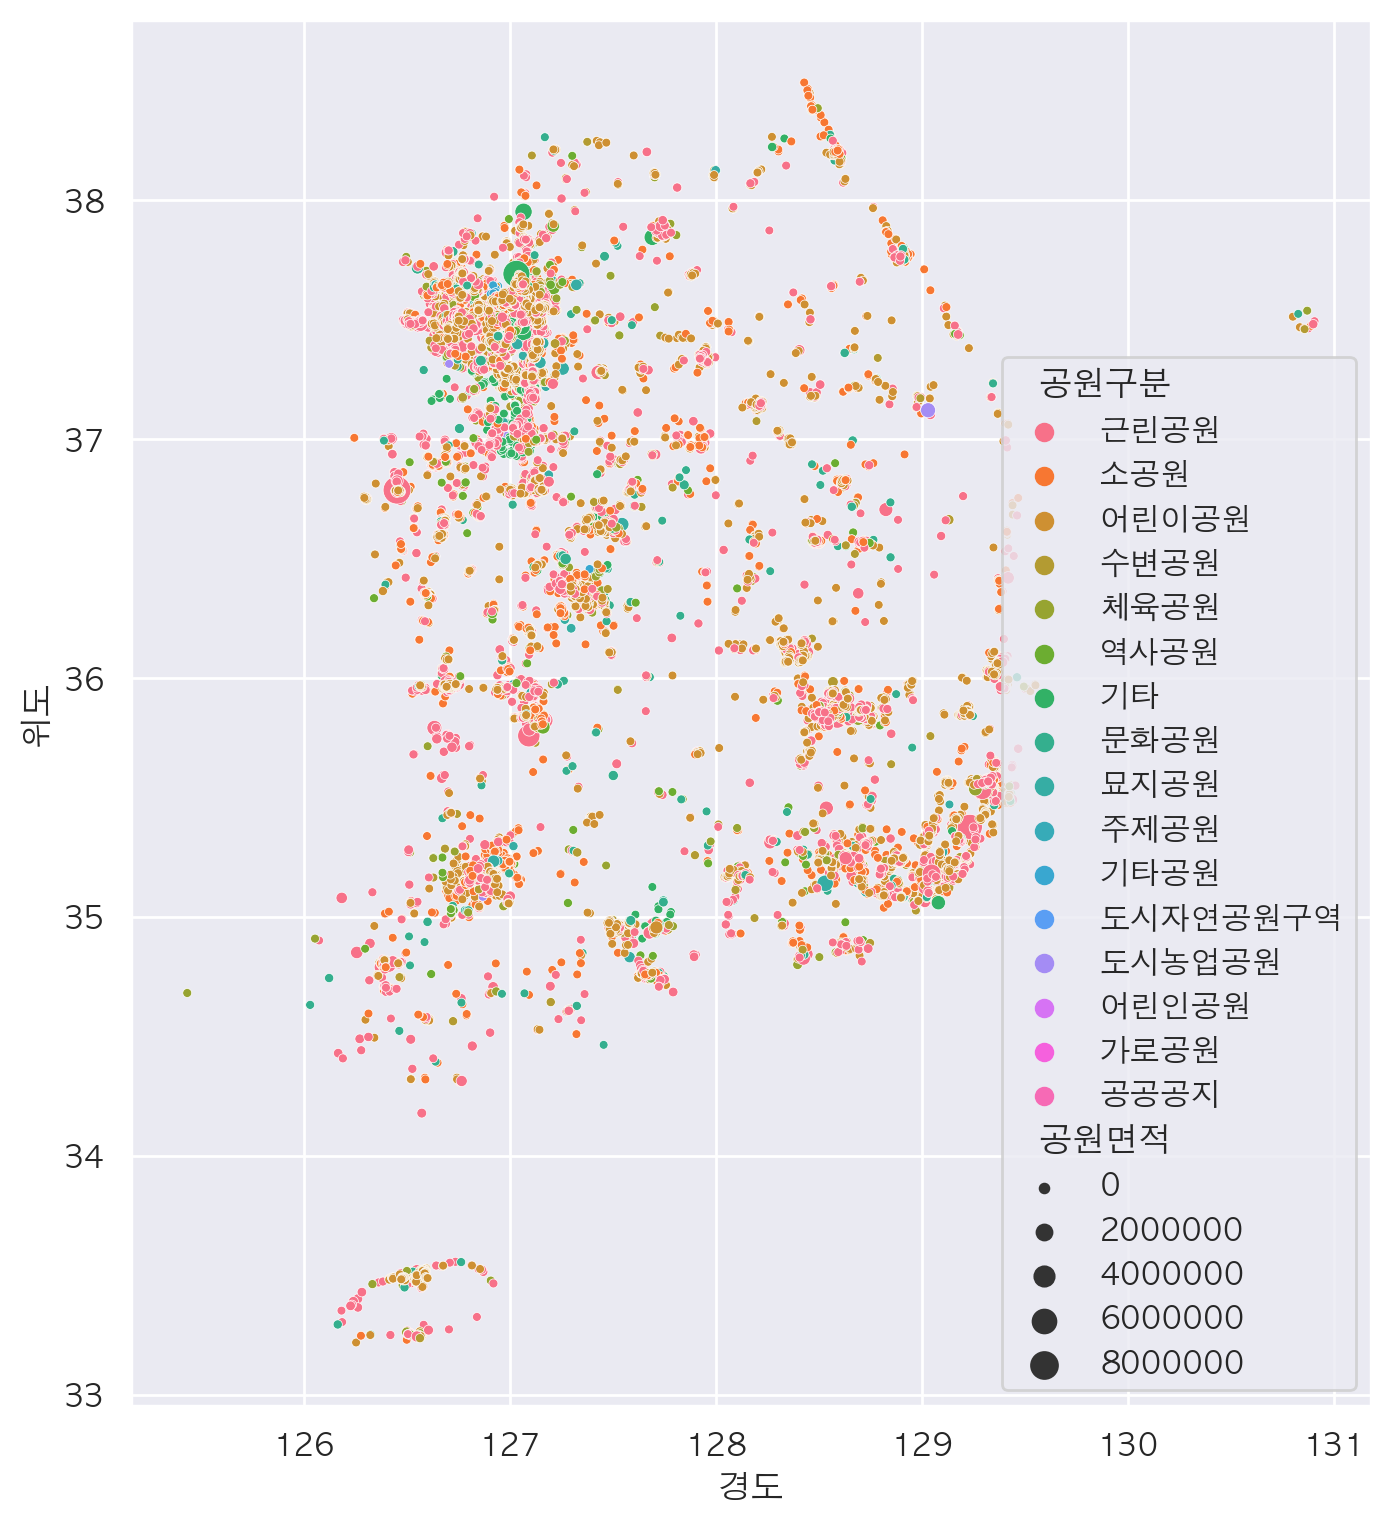

In [82]:
plt.figure(figsize=(8, 9))
sns.scatterplot(data=df_park, x="경도", y="위도", 
                hue="공원구분", size="공원면적", sizes=(10, 100))

## 시도별 공원분포


<Axes: xlabel='경도', ylabel='위도'>

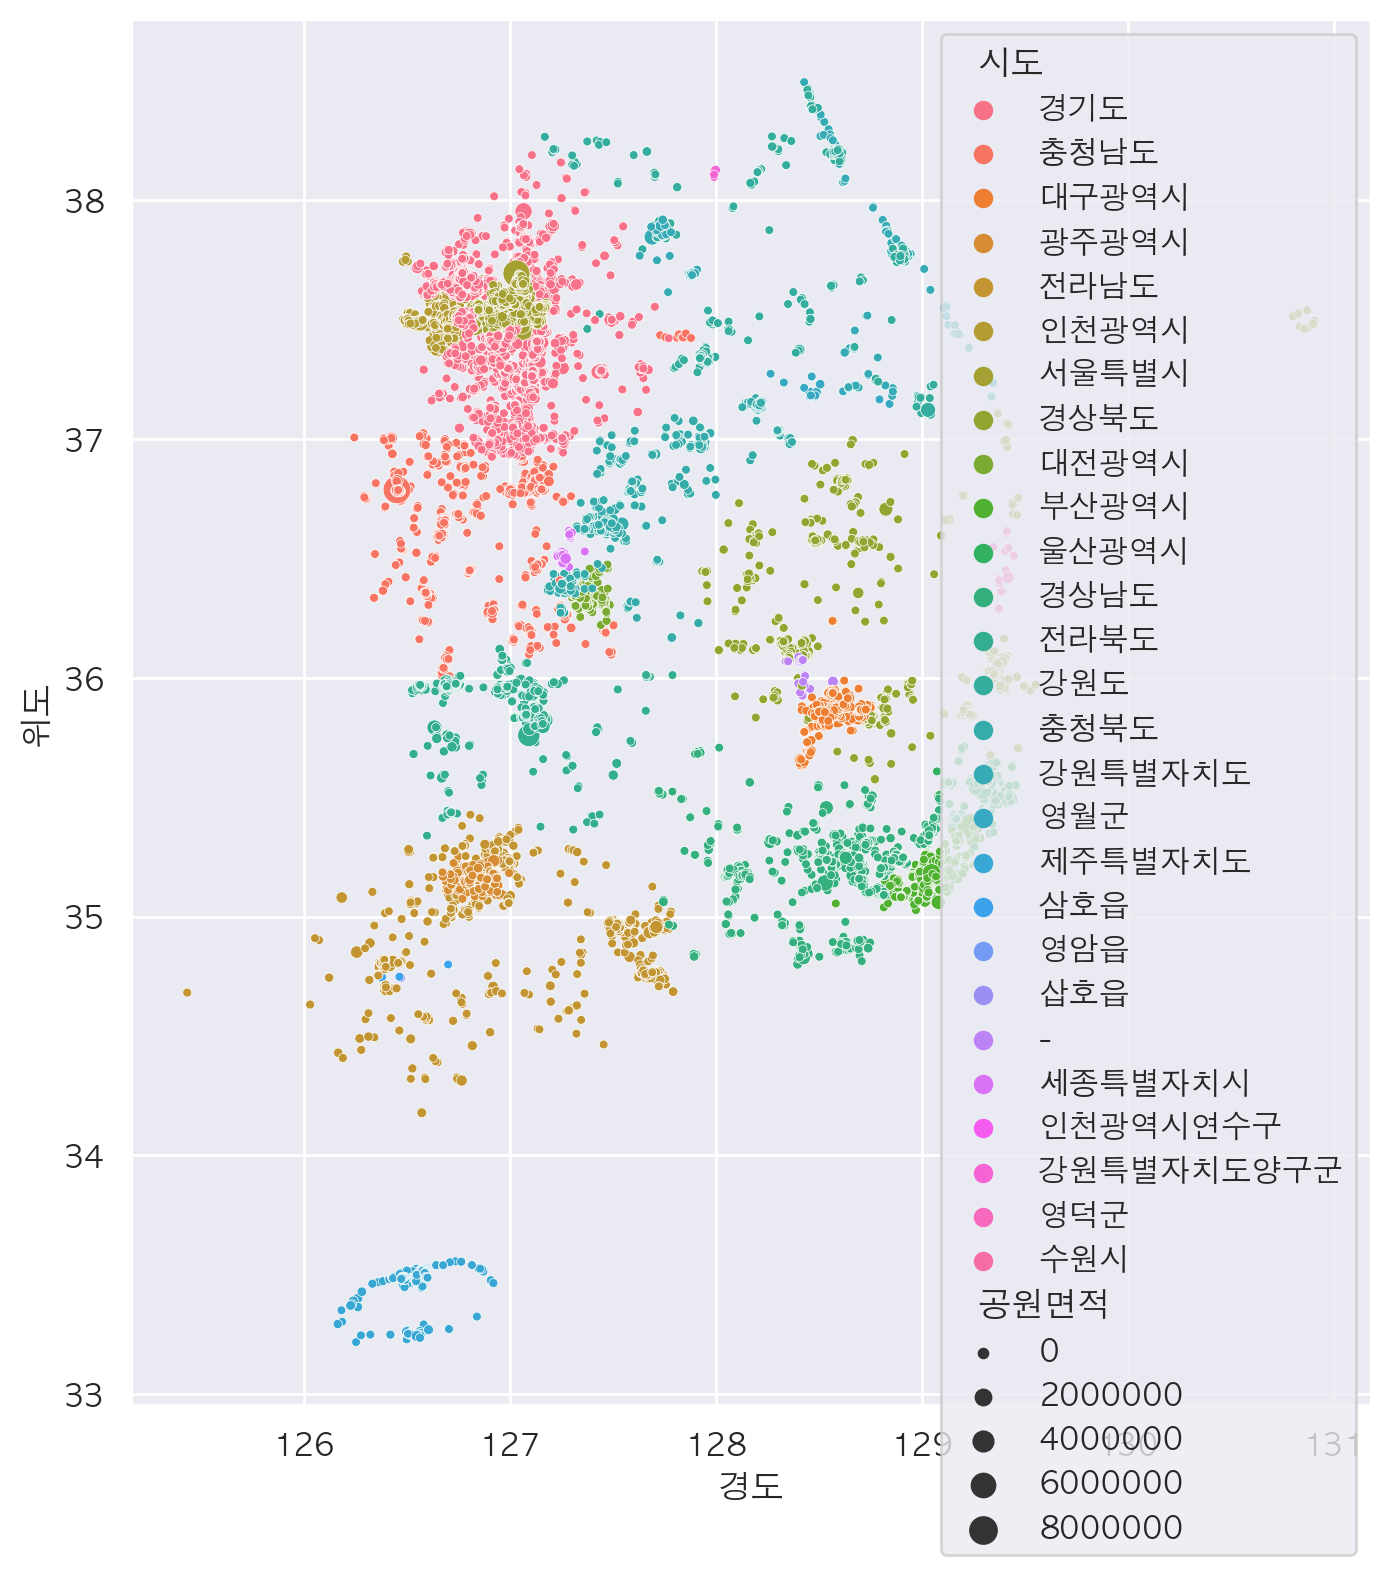

In [83]:
plt.figure(figsize=(8, 9))
sns.scatterplot(data=df_park, x="경도", y="위도", 
                hue="시도", size="공원면적", sizes=(10, 100))

<Axes: xlabel='count', ylabel='시도'>

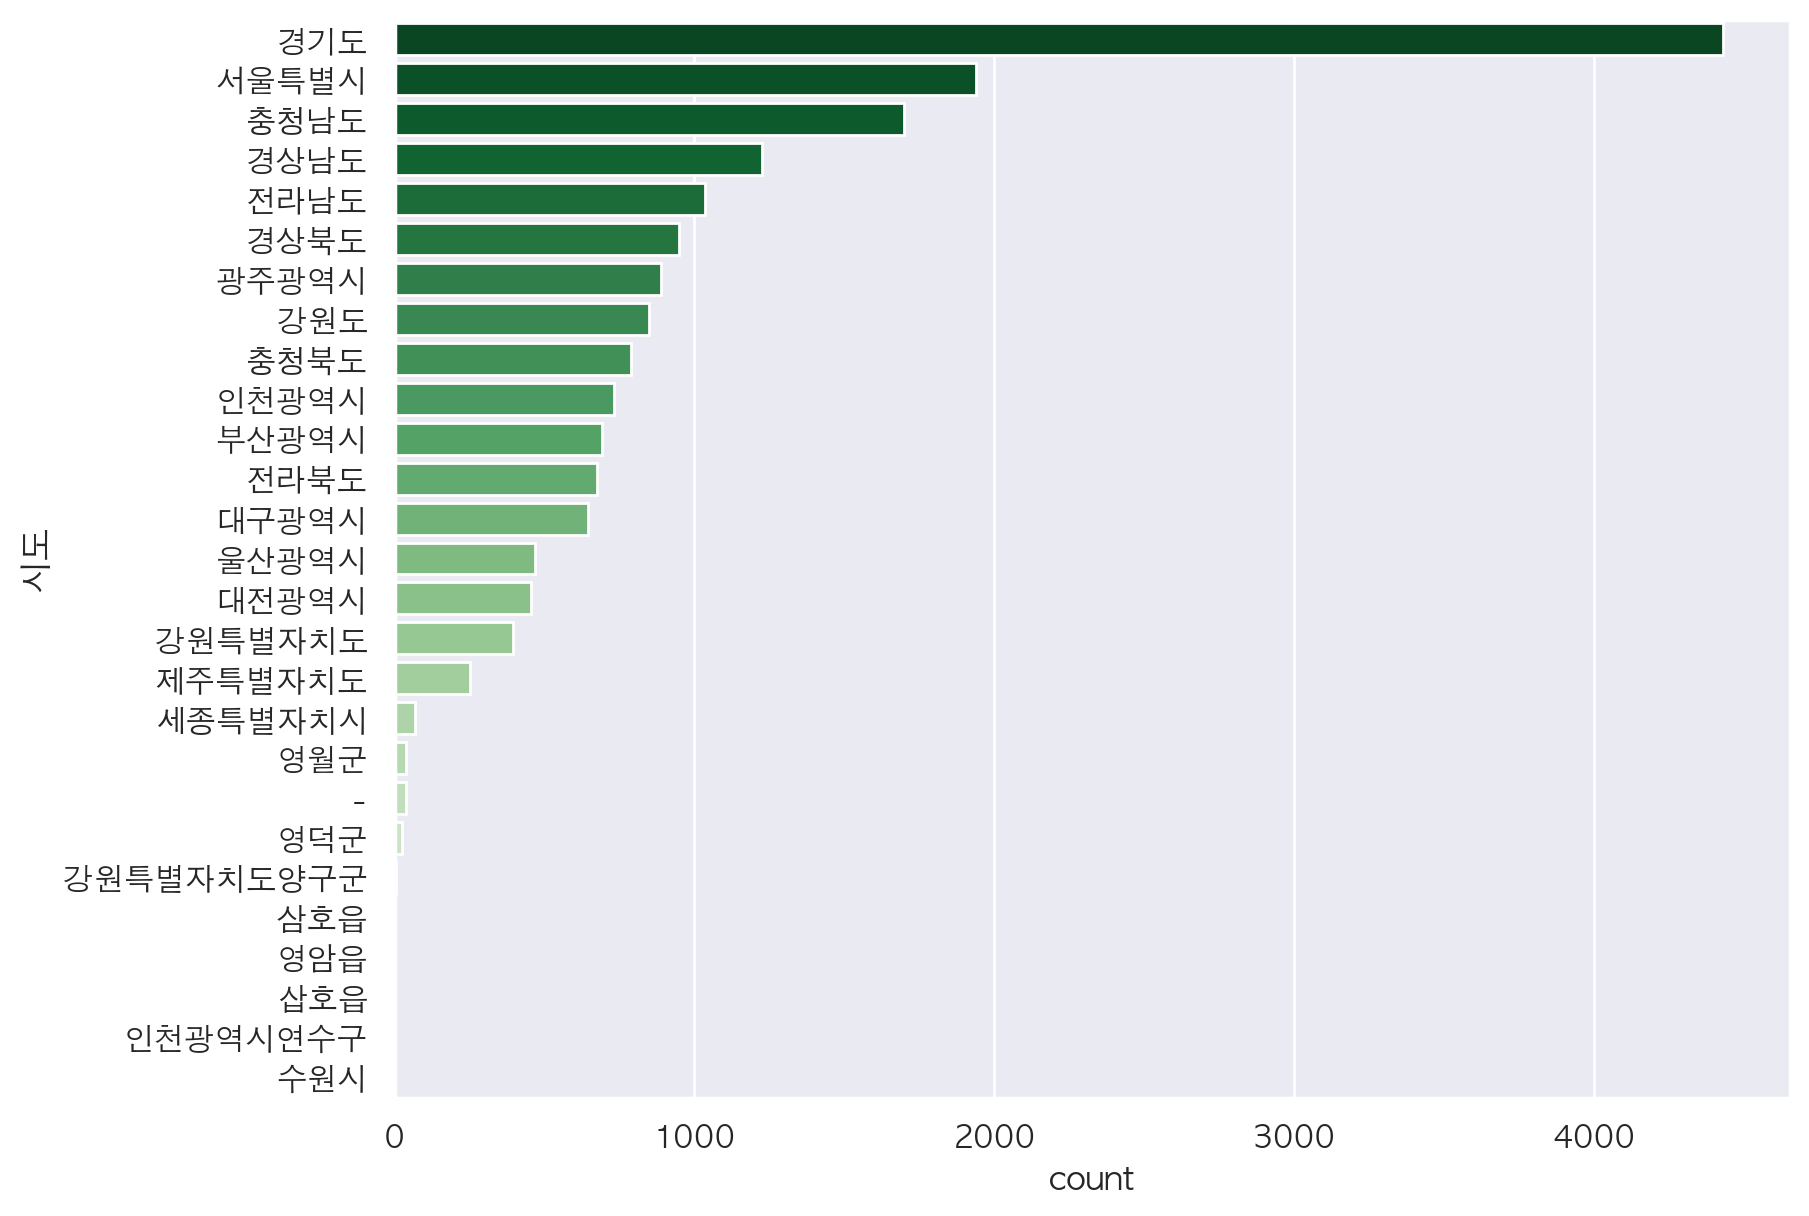

In [84]:
plt.figure(figsize=(9, 7))
sns.countplot(data=df, y="시도", order=city_count.index, palette="Greens_r")

## 특정 공원구분 가져오기

In [85]:
df["공원구분"].value_counts()

공원구분
어린이공원       9453
근린공원        4061
소공원         2877
기타           621
문화공원         406
수변공원         342
체육공원         263
역사공원         195
묘지공원          40
기타공원          30
도시농업공원         7
주제공원           2
도시자연공원구역       2
어린인공원          1
가로공원           1
공공공지           1
Name: count, dtype: int64

In [86]:
park_type = r'.*((역사|체육|수변|문화)공원).*'

park = df[df["공원구분"].str.match(park_type)]
park.shape

(1206, 36)

In [87]:
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

In [88]:
var_pair = var_numbers
var_pair.append("공원구분")
var_pair

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월', '공원구분']

In [89]:
var_pair.remove("지정고시일")
var_pair.remove("고시연도")
var_pair.remove("고시월")
var_pair

['위도', '경도', '공원면적', '공원구분']

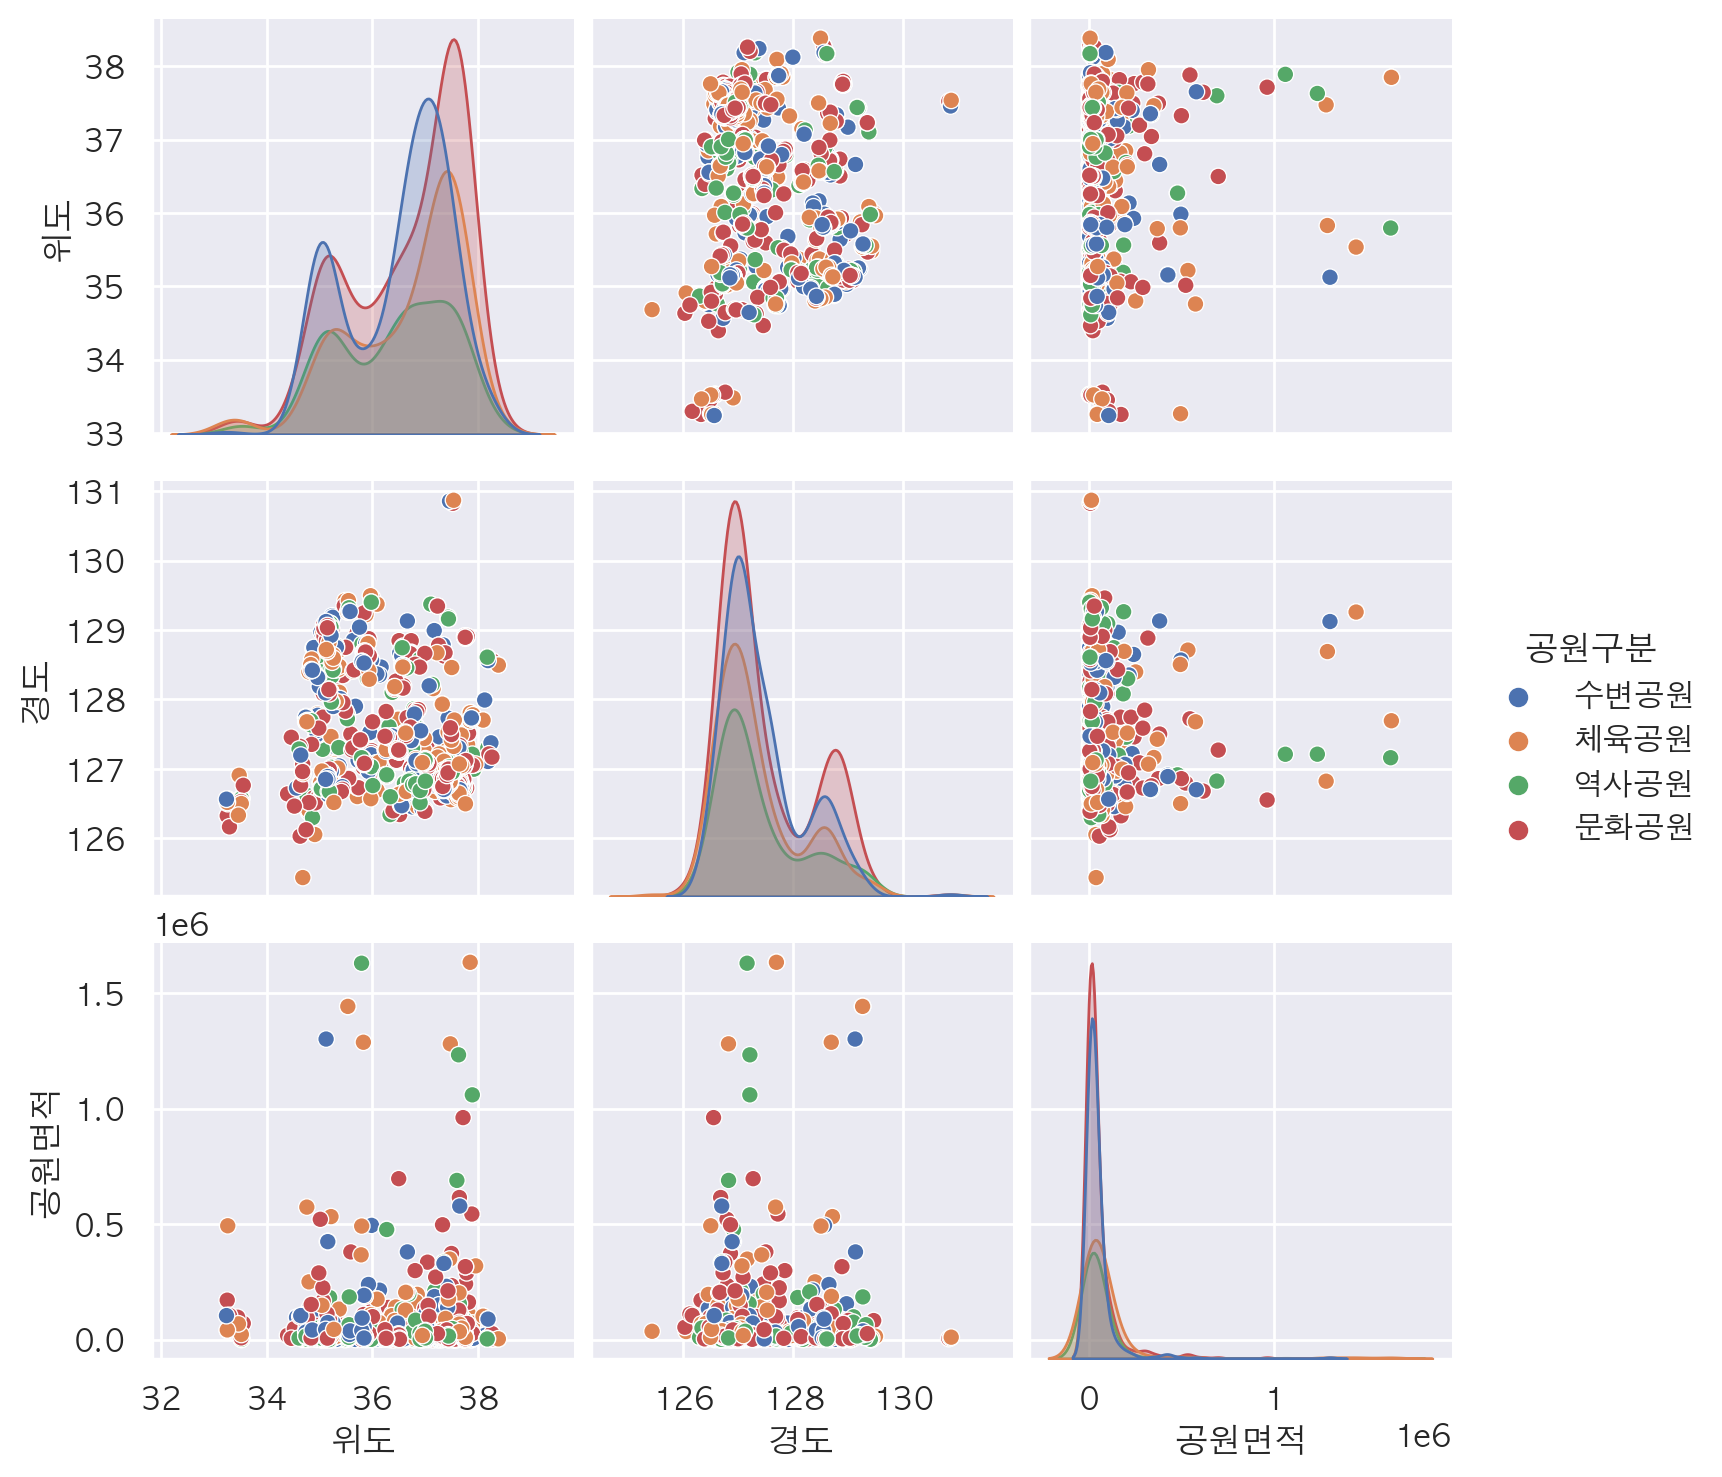

In [90]:
sns.pairplot(park[var_pair], hue="공원구분")

## 피봇테이블로 시도별 공원수와 평균면적 구하기

In [91]:
park_size = pd.pivot_table(df, index="시도", values="공원면적", 
               aggfunc=["count", "mean", "median"])
with pd.option_context('display.precision', 2):
    display(park_size.round(2).style.background_gradient())